In [1]:
# Importing the libraries
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

# Reading and understanding the data

In [2]:
# Reading the dataset
df = pd.read_csv("telecom_churn_data.csv")
df.head()

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,last_date_of_month_9,arpu_6,...,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
0,7000842753,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,197.385,...,0,1.0,1.0,1.0,NaN,968,30.4,0.0,101.20,3.58
1,7001865778,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,34.047,...,0,NaN,1.0,1.0,NaN,1006,0.0,0.0,0.00,0.00
2,7001625959,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,167.690,...,0,NaN,NaN,NaN,1.0,1103,0.0,0.0,4.17,0.00
3,7001204172,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,221.338,...,0,NaN,NaN,NaN,NaN,2491,0.0,0.0,0.00,0.00
4,7000142493,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,261.636,...,0,0.0,NaN,NaN,NaN,1526,0.0,0.0,0.00,0.00


In [3]:
df.shape

(99999, 226)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99999 entries, 0 to 99998
Columns: 226 entries, mobile_number to sep_vbc_3g
dtypes: float64(179), int64(35), object(12)
memory usage: 172.4+ MB


In [5]:
df.describe()

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,...,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
count,9.999900e+04,99999.0,98981.0,98981.0,98981.0,99999.000000,99999.000000,99999.000000,99999.000000,96062.000000,...,99999.000000,25153.000000,25571.000000,26339.000000,25922.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000
mean,7.001207e+09,109.0,0.0,0.0,0.0,282.987358,278.536648,279.154731,261.645069,132.395875,...,0.084581,0.914404,0.908764,0.890808,0.860968,1219.854749,68.170248,66.839062,60.021204,3.299373
std,6.956694e+05,0.0,0.0,0.0,0.0,328.439770,338.156291,344.474791,341.998630,297.207406,...,0.650457,0.279772,0.287950,0.311885,0.345987,954.733842,267.580450,271.201856,253.938223,32.408353
min,7.000000e+09,109.0,0.0,0.0,0.0,-2258.709000,-2014.045000,-945.808000,-1899.505000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,180.000000,0.000000,0.000000,0.000000,0.000000
25%,7.000606e+09,109.0,0.0,0.0,0.0,93.411500,86.980500,84.126000,62.685000,7.380000,...,0.000000,1.000000,1.000000,1.000000,1.000000,467.000000,0.000000,0.000000,0.000000,0.000000
50%,7.001205e+09,109.0,0.0,0.0,0.0,197.704000,191.640000,192.080000,176.849000,34.310000,...,0.000000,1.000000,1.000000,1.000000,1.000000,863.000000,0.000000,0.000000,0.000000,0.000000
75%,7.001812e+09,109.0,0.0,0.0,0.0,371.060000,365.344500,369.370500,353.466500,118.740000,...,0.000000,1.000000,1.000000,1.000000,1.000000,1807.500000,0.000000,0.000000,0.000000,0.000000
max,7.002411e+09,109.0,0.0,0.0,0.0,27731.088000,35145.834000,33543.624000,38805.617000,7376.710000,...,49.000000,1.000000,1.000000,1.000000,1.000000,4337.000000,12916.220000,9165.600000,11166.210000,2618.570000


## Handling missing values

#### Handling missing values in columns

In [6]:
# Calculate the percentage of missing values in each column
missing_percentages = (df.isnull().sum() / len(df)) * 100

# Create a DataFrame with column names and corresponding missing percentages
df_missing_columns = pd.DataFrame({'Column': missing_percentages.index, 'Missing Percentage': missing_percentages.values})

# Sort the DataFrame in descending order based on the missing percentages
df_missing_columns = df_missing_columns.sort_values('Missing Percentage', ascending=False)

# Display the DataFrame
df_missing_columns.head(2)

,Column,Missing Percentage
189,arpu_3g_6,74.846748
197,night_pck_user_6,74.846748


In [7]:
# Find columns with missing percentages greater than 30%
col_list_missing_30 = df_missing_columns[df_missing_columns['Missing Percentage'] > 30]['Column'].tolist()

# Print the list of columns
print(col_list_missing_30)

['arpu_3g_6', 'night_pck_user_6', 'total_rech_data_6', 'arpu_2g_6', 'max_rech_data_6', 'fb_user_6', 'av_rech_amt_data_6', 'date_of_last_rech_data_6', 'count_rech_2g_6', 'count_rech_3g_6', 'date_of_last_rech_data_7', 'total_rech_data_7', 'fb_user_7', 'max_rech_data_7', 'night_pck_user_7', 'count_rech_2g_7', 'av_rech_amt_data_7', 'arpu_2g_7', 'count_rech_3g_7', 'arpu_3g_7', 'total_rech_data_9', 'count_rech_3g_9', 'fb_user_9', 'max_rech_data_9', 'arpu_3g_9', 'date_of_last_rech_data_9', 'night_pck_user_9', 'arpu_2g_9', 'count_rech_2g_9', 'av_rech_amt_data_9', 'total_rech_data_8', 'arpu_3g_8', 'fb_user_8', 'night_pck_user_8', 'av_rech_amt_data_8', 'max_rech_data_8', 'count_rech_3g_8', 'arpu_2g_8', 'count_rech_2g_8', 'date_of_last_rech_data_8']


In [8]:
# Delete the columns having more than 30% missing values
df = df.drop(col_list_missing_30, axis=1)

In [9]:
df.shape

(99999, 186)

##### Deleting the date columns as the date columns are not required in our analysis

In [10]:
# Find columns that contain the string 'date'
date_cols = [col for col in df.columns if 'date' in col.lower()]

# Print the list of date columns
print(date_cols)

['last_date_of_month_6', 'last_date_of_month_7', 'last_date_of_month_8', 'last_date_of_month_9', 'date_of_last_rech_6', 'date_of_last_rech_7', 'date_of_last_rech_8', 'date_of_last_rech_9']


In [11]:
# Dropping date columns
df = df.drop(date_cols, axis=1)

In [12]:
# Drop circle_id column
df = df.drop('circle_id', axis=1)

In [13]:
df.shape

(99999, 177)

### Filter high-value customers

In [14]:
# Calculate the average recharge amount
df['avg_rech_amt_6_7'] = np.mean(df[['total_rech_amt_6', 'total_rech_amt_7']], axis=1)

In [15]:
X = df['avg_rech_amt_6_7'].quantile(0.7)
X

368.5

In [16]:
df = df[df['avg_rech_amt_6_7'] >= X]
df.head()

,mobile_number,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,...,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,avg_rech_amt_6_7
7,7000701601,0.0,0.0,0.0,1069.180,1349.850,3171.480,500.000,57.84,54.68,...,0,0,0,0,802,57.74,19.38,18.74,0.0,1185.0
8,7001524846,0.0,0.0,0.0,378.721,492.223,137.362,166.787,413.69,351.03,...,0,0,0,0,315,21.03,910.65,122.16,0.0,519.0
13,7002191713,0.0,0.0,0.0,492.846,205.671,593.260,322.732,501.76,108.39,...,0,0,0,0,2607,0.00,0.00,0.00,0.0,380.0
16,7000875565,0.0,0.0,0.0,430.975,299.869,187.894,206.490,50.51,74.01,...,0,0,0,0,511,0.00,2.45,21.89,0.0,459.0
17,7000187447,0.0,0.0,0.0,690.008,18.980,25.499,257.583,1185.91,9.28,...,0,0,0,0,667,0.00,0.00,0.00,0.0,408.0


In [17]:
df.shape

(30011, 178)

#### Handling missing values in rows

In [18]:
# Count the rows with more than 50% missing values
num_rows_missing_50 = len(df.columns) - df.count(axis=1)

# Filter the DataFrame for rows with more than 50% missing values
df_missing_rows_50 = df[num_rows_missing_50 > (len(df.columns) / 2)]

# Get the shape of the filtered DataFrame
num_rows = df_missing_rows_50.shape[0]

# Print the count of rows
print(num_rows)

114


In [19]:
# Deleting the rows having more than 50% missing values
df = df.drop(df_missing_rows_50.index)
df.shape

(29897, 178)

In [20]:
df_missing_columns = (round(((df.isnull().sum()/len(df.index))*100), 2)
                      .to_frame('null')
                      .sort_values('null', ascending=False))
df_missing_columns.head()

,null
loc_ic_mou_9,5.32
og_others_9,5.32
loc_og_t2t_mou_9,5.32
loc_ic_t2t_mou_9,5.32
loc_og_t2m_mou_9,5.32


In [21]:
mou_sep_9_cols = df_missing_columns[df_missing_columns['null'] == 5.32].index.to_list()
print(mou_sep_9_cols)

['loc_ic_mou_9', 'og_others_9', 'loc_og_t2t_mou_9', 'loc_ic_t2t_mou_9', 'loc_og_t2m_mou_9', 'loc_og_t2f_mou_9', 'loc_og_t2c_mou_9', 'std_ic_t2m_mou_9', 'loc_og_mou_9', 'std_og_t2t_mou_9', 'roam_og_mou_9', 'std_ic_t2o_mou_9', 'std_og_t2m_mou_9', 'std_og_t2f_mou_9', 'spl_og_mou_9', 'std_og_t2c_mou_9', 'std_og_mou_9', 'isd_og_mou_9', 'std_ic_t2t_mou_9', 'std_ic_mou_9', 'onnet_mou_9', 'spl_ic_mou_9', 'ic_others_9', 'isd_ic_mou_9', 'loc_ic_t2f_mou_9', 'offnet_mou_9', 'loc_ic_t2m_mou_9', 'std_ic_t2f_mou_9', 'roam_ic_mou_9']


In [22]:
# Specify the columns related to MOU Sep(9)
mou_columns = ['loc_og_t2m_mou_9', 'loc_ic_t2f_mou_9', 'roam_og_mou_9', 'std_ic_t2m_mou_9',
               'loc_og_t2t_mou_9', 'std_ic_t2t_mou_9', 'loc_og_t2f_mou_9', 'loc_ic_mou_9',
               'loc_og_t2c_mou_9', 'loc_og_mou_9', 'std_og_t2t_mou_9', 'roam_ic_mou_9',
               'loc_ic_t2m_mou_9', 'std_og_t2m_mou_9', 'loc_ic_t2t_mou_9', 'std_og_t2f_mou_9',
               'std_og_t2c_mou_9', 'og_others_9', 'std_og_mou_9', 'spl_og_mou_9',
               'std_ic_t2f_mou_9', 'isd_og_mou_9', 'std_ic_mou_9', 'offnet_mou_9',
               'isd_ic_mou_9', 'ic_others_9', 'std_ic_t2o_mou_9', 'onnet_mou_9',
               'spl_ic_mou_9']

# Filter the DataFrame based on null values in MOU columns
df_null_mou_9 = df[df[mou_columns].isnull().all(axis=1)]

df_null_mou_9.head()

,mobile_number,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,...,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,avg_rech_amt_6_7
7,7000701601,0.0,0.0,0.0,1069.180,1349.850,3171.480,500.0,57.84,54.68,...,0,0,0,0,802,57.74,19.38,18.74,0.0,1185.0
97,7000589828,0.0,0.0,0.0,374.863,294.023,183.043,0.0,433.59,415.66,...,0,0,0,0,502,0.00,0.00,0.00,0.0,380.0
111,7001300706,0.0,0.0,0.0,596.301,146.073,0.000,0.0,55.19,3.26,...,1,0,0,0,332,0.00,0.00,0.00,0.0,441.0
143,7000106299,0.0,0.0,0.0,695.609,39.981,0.000,0.0,1325.91,28.61,...,0,0,0,0,264,0.00,0.00,0.00,0.0,418.0
188,7000340381,0.0,0.0,0.0,734.641,183.668,0.000,0.0,4.38,0.98,...,0,0,0,0,244,0.00,831.48,1223.04,0.0,492.0


In [23]:
df_null_mou_9.shape

(1590, 178)

In [24]:
# Deleting the records for which MOU for Sep(9) are null
df = df.drop(df_null_mou_9.index)

In [25]:
df_missing_columns = (df.isnull().mean() * 100).round(2).to_frame('null').sort_values('null', ascending=False)

In [26]:
# Listing the columns of MOU Aug(8)
print(((df_missing_columns[df_missing_columns['null'] == 0.55]).index).to_list())

['isd_og_mou_8', 'roam_ic_mou_8', 'loc_og_mou_8', 'std_ic_t2o_mou_8', 'roam_og_mou_8', 'loc_ic_t2f_mou_8', 'loc_og_t2t_mou_8', 'std_ic_t2f_mou_8', 'std_og_t2m_mou_8', 'loc_og_t2m_mou_8', 'std_og_t2t_mou_8', 'std_ic_t2m_mou_8', 'loc_og_t2f_mou_8', 'spl_og_mou_8', 'loc_ic_mou_8', 'loc_og_t2c_mou_8', 'std_ic_t2t_mou_8', 'loc_ic_t2m_mou_8', 'std_og_t2f_mou_8', 'spl_ic_mou_8', 'std_ic_mou_8', 'offnet_mou_8', 'ic_others_8', 'og_others_8', 'loc_ic_t2t_mou_8', 'onnet_mou_8', 'isd_ic_mou_8', 'std_og_t2c_mou_8', 'std_og_mou_8']


In [27]:
# Specify the columns related to MOU Aug(8)
mou_columns = ['loc_og_t2m_mou_8', 'loc_ic_t2f_mou_8', 'roam_og_mou_8', 'std_ic_t2m_mou_8',
               'loc_og_t2t_mou_8', 'std_ic_t2t_mou_8', 'loc_og_t2f_mou_8', 'loc_ic_mou_8',
               'loc_og_t2c_mou_8', 'loc_og_mou_8', 'std_og_t2t_mou_8', 'roam_ic_mou_8',
               'loc_ic_t2m_mou_8', 'std_og_t2m_mou_8', 'loc_ic_t2t_mou_8', 'std_og_t2f_mou_8',
               'std_og_t2c_mou_8', 'og_others_8', 'std_og_mou_8', 'spl_og_mou_8',
               'std_ic_t2f_mou_8', 'isd_og_mou_8', 'std_ic_mou_8', 'offnet_mou_8',
               'isd_ic_mou_8', 'ic_others_8', 'std_ic_t2o_mou_8', 'onnet_mou_8',
               'spl_ic_mou_8']

# Filter the DataFrame based on null values in MOU columns
df_null_mou_8 = df[df[mou_columns].isnull().all(axis=1)]

df_null_mou_8.head()

,mobile_number,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,...,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,avg_rech_amt_6_7
375,7002252754,0.0,0.0,0.0,580.477,111.878,0.0,378.881,249.43,39.64,...,0,0,0,0,1102,0.0,0.0,0.0,0.0,415.0
578,7000248548,0.0,0.0,0.0,569.612,237.289,0.0,4.440,718.01,212.73,...,0,0,0,0,274,0.0,0.0,0.0,0.0,468.5
788,7000636808,0.0,0.0,0.0,532.742,546.756,0.0,269.274,1173.39,891.83,...,0,0,0,0,936,0.0,0.0,0.0,0.0,604.0
1802,7000516213,0.0,0.0,0.0,810.455,0.000,0.0,0.000,91.33,NaN,...,0,0,0,0,755,0.0,0.0,0.0,0.0,477.5
4837,7002192662,0.0,0.0,0.0,649.150,149.572,0.0,0.250,1354.24,85.13,...,0,0,0,0,520,0.0,0.0,0.0,0.0,421.0


In [28]:
# Deleting the records for which MOU for Aug(8) are null
df = df.drop(df_null_mou_8.index)

In [29]:
df_missing_columns = (df.isnull().mean() * 100).round(2).to_frame('null').sort_values('null', ascending=False)

In [30]:
# Listing the columns of MOU Jun(6)
print(((df_missing_columns[df_missing_columns['null'] == 0.44]).index).to_list())

['roam_ic_mou_6', 'spl_og_mou_6', 'og_others_6', 'loc_ic_t2t_mou_6', 'loc_og_t2m_mou_6', 'loc_og_t2c_mou_6', 'loc_ic_t2m_mou_6', 'isd_og_mou_6', 'loc_og_t2t_mou_6', 'std_og_t2m_mou_6', 'loc_ic_t2f_mou_6', 'ic_others_6', 'roam_og_mou_6', 'loc_ic_mou_6', 'std_og_mou_6', 'loc_og_t2f_mou_6', 'isd_ic_mou_6', 'std_ic_t2t_mou_6', 'std_ic_mou_6', 'std_og_t2t_mou_6', 'std_ic_t2o_mou_6', 'std_og_t2f_mou_6', 'std_ic_t2f_mou_6', 'spl_ic_mou_6', 'onnet_mou_6', 'std_og_t2c_mou_6', 'std_ic_t2m_mou_6', 'offnet_mou_6', 'loc_og_mou_6']


In [31]:
# Specify the columns related to MOU Jun(6)
mou_columns = ['loc_og_t2m_mou_6', 'loc_ic_t2f_mou_6', 'roam_og_mou_6', 'std_ic_t2m_mou_6',
               'loc_og_t2t_mou_6', 'std_ic_t2t_mou_6', 'loc_og_t2f_mou_6', 'loc_ic_mou_6',
               'loc_og_t2c_mou_6', 'loc_og_mou_6', 'std_og_t2t_mou_6', 'roam_ic_mou_6',
               'loc_ic_t2m_mou_6', 'std_og_t2m_mou_6', 'loc_ic_t2t_mou_6', 'std_og_t2f_mou_6',
               'std_og_t2c_mou_6', 'og_others_6', 'std_og_mou_6', 'spl_og_mou_6',
               'std_ic_t2f_mou_6', 'isd_og_mou_6', 'std_ic_mou_6', 'offnet_mou_6',
               'isd_ic_mou_6', 'ic_others_6', 'std_ic_t2o_mou_6', 'onnet_mou_6',
               'spl_ic_mou_6']

# Filter the DataFrame based on null values in MOU columns
df_null_mou_6 = df[df[mou_columns].isnull().all(axis=1)]

df_null_mou_6.head()

,mobile_number,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,...,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,avg_rech_amt_6_7
77,7001328263,0.0,0.0,0.0,30.000,82.378,674.950,158.710,NaN,34.23,...,0,0,0,0,1894,0.00,0.00,0.00,0.00,577.0
364,7002168045,0.0,0.0,0.0,0.000,792.112,989.368,923.040,NaN,433.49,...,0,0,1,0,424,0.00,0.00,0.00,0.00,485.0
423,7000635248,0.0,0.0,0.0,213.802,304.194,149.710,329.643,NaN,0.00,...,0,0,0,0,945,73.55,266.94,63.04,0.00,421.5
934,7002152278,0.0,0.0,0.0,48.000,764.152,500.030,194.400,NaN,14.24,...,0,0,2,1,490,188.83,215.00,0.00,24.18,651.0
1187,7000486275,0.0,0.0,0.0,0.000,757.170,995.719,0.000,NaN,1366.71,...,0,0,0,0,737,0.00,0.00,0.00,0.00,441.5


In [32]:
df = df.drop(df_null_mou_6.index)

In [33]:
df_missing_columns = (df.isnull().mean() * 100).round(2).to_frame('null').sort_values('null', ascending=False)
df_missing_columns.head()

,null
loc_ic_t2f_mou_7,0.12
isd_ic_mou_7,0.12
loc_og_t2f_mou_7,0.12
loc_og_t2c_mou_7,0.12
loc_og_mou_7,0.12


In [34]:
# Listing the columns of MOU Jul(7)
print(((df_missing_columns[df_missing_columns['null'] == 0.12]).index).to_list())

['loc_ic_t2f_mou_7', 'isd_ic_mou_7', 'loc_og_t2f_mou_7', 'loc_og_t2c_mou_7', 'loc_og_mou_7', 'std_og_t2t_mou_7', 'std_og_t2f_mou_7', 'std_og_t2c_mou_7', 'std_og_mou_7', 'ic_others_7', 'isd_og_mou_7', 'spl_og_mou_7', 'loc_og_t2t_mou_7', 'og_others_7', 'spl_ic_mou_7', 'loc_ic_t2t_mou_7', 'std_ic_mou_7', 'loc_ic_t2m_mou_7', 'std_ic_t2o_mou_7', 'std_ic_t2f_mou_7', 'loc_ic_mou_7', 'std_ic_t2t_mou_7', 'loc_og_t2m_mou_7', 'std_og_t2m_mou_7', 'std_ic_t2m_mou_7', 'roam_ic_mou_7', 'onnet_mou_7', 'roam_og_mou_7', 'offnet_mou_7']


In [35]:
# Creating a dataframe with the condition, in which MOU for Jul(7) are null
df_null_mou_7 = df[(df['loc_og_t2m_mou_7'].isnull()) & (df['loc_ic_t2f_mou_7'].isnull()) & (df['roam_og_mou_7'].isnull()) & (df['std_ic_t2m_mou_7'].isnull()) &
  (df['loc_og_t2t_mou_7'].isnull()) & (df['std_ic_t2t_mou_7'].isnull()) & (df['loc_og_t2f_mou_7'].isnull()) & (df['loc_ic_mou_7'].isnull()) &
  (df['loc_og_t2c_mou_7'].isnull()) & (df['loc_og_mou_7'].isnull()) & (df['std_og_t2t_mou_7'].isnull()) & (df['roam_ic_mou_7'].isnull()) &
  (df['loc_ic_t2m_mou_7'].isnull()) & (df['std_og_t2m_mou_7'].isnull()) & (df['loc_ic_t2t_mou_7'].isnull()) & (df['std_og_t2f_mou_7'].isnull()) & 
  (df['std_og_t2c_mou_7'].isnull()) & (df['og_others_7'].isnull()) & (df['std_og_mou_7'].isnull()) & (df['spl_og_mou_7'].isnull()) & 
  (df['std_ic_t2f_mou_7'].isnull()) & (df['isd_og_mou_7'].isnull()) & (df['std_ic_mou_7'].isnull()) & (df['offnet_mou_7'].isnull()) & 
  (df['isd_ic_mou_7'].isnull()) & (df['ic_others_7'].isnull()) & (df['std_ic_t2o_mou_7'].isnull()) & (df['onnet_mou_7'].isnull()) & 
  (df['spl_ic_mou_7'].isnull())]

df_null_mou_7.head()

,mobile_number,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,...,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,avg_rech_amt_6_7
5616,7001238202,0.0,0.0,0.0,760.815,531.088,992.818,1144.676,324.91,NaN,...,0,0,0,0,576,63.38,0.0,0.0,163.39,778.0
9451,7001477649,0.0,0.0,0.0,1129.566,0.000,128.252,802.648,11.89,NaN,...,0,0,0,0,672,0.00,0.0,0.0,0.00,603.0
9955,7001658068,0.0,0.0,0.0,925.028,189.000,789.761,445.707,46.39,NaN,...,0,0,0,0,3107,0.00,0.0,0.0,0.00,692.5
10724,7001391499,0.0,0.0,0.0,894.818,85.000,207.040,363.314,117.21,NaN,...,0,0,0,0,2664,0.00,0.0,0.0,0.00,510.0
12107,7000131738,0.0,0.0,0.0,1803.475,0.000,0.600,25.243,1742.61,NaN,...,0,0,0,0,219,0.00,0.0,0.0,0.00,995.0


In [36]:
# Deleting the records for which MOU for Jul(7) are null
df = df.drop(df_null_mou_7.index)

In [37]:
# Again cheking percent of missing values in columns
df_missing_columns = (round(((df.isnull().sum()/len(df.index))*100),2).to_frame('null')).sort_values('null', ascending=False)
df_missing_columns

,null
mobile_number,0.0
total_rech_num_7,0.0
std_ic_mou_7,0.0
std_ic_mou_8,0.0
std_ic_mou_9,0.0
...,...
std_og_mou_7,0.0
std_og_mou_8,0.0
std_og_mou_9,0.0
isd_og_mou_6,0.0


In [38]:
df.shape

(27991, 178)

In [39]:
# Checking percentage of rows we have lost while handling the missing values
round((1- (len(df.index)/30011)),2)

0.07

### Tag churners

In [40]:
df['churn'] = ((df['total_ic_mou_9'] == 0) & (df['total_og_mou_9'] == 0) & (df['vol_2g_mb_9'] == 0) & (df['vol_3g_mb_9'] == 0)).astype(int)

In [41]:
df.head()

,mobile_number,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,...,sachet_3g_7,sachet_3g_8,sachet_3g_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,avg_rech_amt_6_7,churn
8,7001524846,0.0,0.0,0.0,378.721,492.223,137.362,166.787,413.69,351.03,...,0,0,0,315,21.03,910.65,122.16,0.0,519.0,0
13,7002191713,0.0,0.0,0.0,492.846,205.671,593.260,322.732,501.76,108.39,...,0,0,0,2607,0.00,0.00,0.00,0.0,380.0,0
16,7000875565,0.0,0.0,0.0,430.975,299.869,187.894,206.490,50.51,74.01,...,0,0,0,511,0.00,2.45,21.89,0.0,459.0,0
17,7000187447,0.0,0.0,0.0,690.008,18.980,25.499,257.583,1185.91,9.28,...,0,0,0,667,0.00,0.00,0.00,0.0,408.0,0
21,7002124215,0.0,0.0,0.0,514.453,597.753,637.760,578.596,102.41,132.11,...,0,0,0,720,0.00,0.00,0.00,0.0,640.0,0


#### Deleting all the attributes corresponding to the churn phase

In [42]:
col_9 = list(filter(lambda col: '_9' in col, df.columns))
print(col_9)

['arpu_9', 'onnet_mou_9', 'offnet_mou_9', 'roam_ic_mou_9', 'roam_og_mou_9', 'loc_og_t2t_mou_9', 'loc_og_t2m_mou_9', 'loc_og_t2f_mou_9', 'loc_og_t2c_mou_9', 'loc_og_mou_9', 'std_og_t2t_mou_9', 'std_og_t2m_mou_9', 'std_og_t2f_mou_9', 'std_og_t2c_mou_9', 'std_og_mou_9', 'isd_og_mou_9', 'spl_og_mou_9', 'og_others_9', 'total_og_mou_9', 'loc_ic_t2t_mou_9', 'loc_ic_t2m_mou_9', 'loc_ic_t2f_mou_9', 'loc_ic_mou_9', 'std_ic_t2t_mou_9', 'std_ic_t2m_mou_9', 'std_ic_t2f_mou_9', 'std_ic_t2o_mou_9', 'std_ic_mou_9', 'total_ic_mou_9', 'spl_ic_mou_9', 'isd_ic_mou_9', 'ic_others_9', 'total_rech_num_9', 'total_rech_amt_9', 'max_rech_amt_9', 'last_day_rch_amt_9', 'vol_2g_mb_9', 'vol_3g_mb_9', 'monthly_2g_9', 'sachet_2g_9', 'monthly_3g_9', 'sachet_3g_9']


In [43]:
# Deleting the churn month columns
df = df.drop(col_9, axis=1)

In [44]:
# Dropping sep_vbc_3g column
df = df.drop('sep_vbc_3g', axis=1)

#### Checking churn percentage

In [45]:
round(100*(df['churn'].mean()),2)

3.39

## Outliers treatment

In [46]:
df['mobile_number'] = df['mobile_number'].astype(object)
df['churn'] = df['churn'].astype(object)

In [47]:
numeric_cols = [col for col in df.columns if df[col].dtype != 'object']
print(numeric_cols)

['loc_og_t2o_mou', 'std_og_t2o_mou', 'loc_ic_t2o_mou', 'arpu_6', 'arpu_7', 'arpu_8', 'onnet_mou_6', 'onnet_mou_7', 'onnet_mou_8', 'offnet_mou_6', 'offnet_mou_7', 'offnet_mou_8', 'roam_ic_mou_6', 'roam_ic_mou_7', 'roam_ic_mou_8', 'roam_og_mou_6', 'roam_og_mou_7', 'roam_og_mou_8', 'loc_og_t2t_mou_6', 'loc_og_t2t_mou_7', 'loc_og_t2t_mou_8', 'loc_og_t2m_mou_6', 'loc_og_t2m_mou_7', 'loc_og_t2m_mou_8', 'loc_og_t2f_mou_6', 'loc_og_t2f_mou_7', 'loc_og_t2f_mou_8', 'loc_og_t2c_mou_6', 'loc_og_t2c_mou_7', 'loc_og_t2c_mou_8', 'loc_og_mou_6', 'loc_og_mou_7', 'loc_og_mou_8', 'std_og_t2t_mou_6', 'std_og_t2t_mou_7', 'std_og_t2t_mou_8', 'std_og_t2m_mou_6', 'std_og_t2m_mou_7', 'std_og_t2m_mou_8', 'std_og_t2f_mou_6', 'std_og_t2f_mou_7', 'std_og_t2f_mou_8', 'std_og_t2c_mou_6', 'std_og_t2c_mou_7', 'std_og_t2c_mou_8', 'std_og_mou_6', 'std_og_mou_7', 'std_og_mou_8', 'isd_og_mou_6', 'isd_og_mou_7', 'isd_og_mou_8', 'spl_og_mou_6', 'spl_og_mou_7', 'spl_og_mou_8', 'og_others_6', 'og_others_7', 'og_others_8', 'to

In [48]:
# Removing outliers below 10th and above 90th percentile
for col in numeric_cols: 
    q1 = df[col].quantile(0.10)
    q3 = df[col].quantile(0.90)
    iqr = q3-q1
    range_low  = q1-1.5*iqr
    range_high = q3+1.5*iqr
    # Assigning the filtered dataset into data
    data = df.loc[(df[col] > range_low) & (df[col] < range_high)]

data.shape

(27705, 136)

### Derive new features

In [49]:
# List the columns of total mou, rech_num and rech_amt
[total for total in data.columns.to_list() if 'total' in total]

['total_og_mou_6',
 'total_og_mou_7',
 'total_og_mou_8',
 'total_ic_mou_6',
 'total_ic_mou_7',
 'total_ic_mou_8',
 'total_rech_num_6',
 'total_rech_num_7',
 'total_rech_num_8',
 'total_rech_amt_6',
 'total_rech_amt_7',
 'total_rech_amt_8']

In [50]:
# Total mou at good phase incoming and outgoing
data['total_mou_good'] = (data['total_og_mou_6'] + data['total_ic_mou_6'])

In [51]:
# Avg. mou at action phase
# We are taking average because there are two months(7 and 8) in action phase
data['avg_mou_action'] = (data['total_og_mou_7'] + data['total_og_mou_8'] + data['total_ic_mou_7'] + data['total_ic_mou_8'])/2

In [52]:
# Difference avg_mou_good and avg_mou_action
data['diff_mou'] = data['avg_mou_action'] - data['total_mou_good']

In [53]:
# Checking whether the mou has decreased in action phase
data['decrease_mou_action'] = np.where((data['diff_mou'] < 0), 1, 0)

In [54]:
data.head()

,mobile_number,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,...,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,avg_rech_amt_6_7,churn,total_mou_good,avg_mou_action,diff_mou,decrease_mou_action
8,7001524846,0.0,0.0,0.0,378.721,492.223,137.362,413.69,351.03,35.08,...,315,21.03,910.65,122.16,519.0,0,612.22,324.125,-288.095,1
13,7002191713,0.0,0.0,0.0,492.846,205.671,593.260,501.76,108.39,534.24,...,2607,0.00,0.00,0.00,380.0,0,1875.70,1262.390,-613.310,1
16,7000875565,0.0,0.0,0.0,430.975,299.869,187.894,50.51,74.01,70.61,...,511,0.00,2.45,21.89,459.0,0,711.67,597.705,-113.965,1
17,7000187447,0.0,0.0,0.0,690.008,18.980,25.499,1185.91,9.28,7.79,...,667,0.00,0.00,0.00,408.0,0,1341.41,1.560,-1339.850,1
21,7002124215,0.0,0.0,0.0,514.453,597.753,637.760,102.41,132.11,85.14,...,720,0.00,0.00,0.00,640.0,0,1067.43,1245.130,177.700,0


In [55]:
# Avg rech number at action phase
data['avg_rech_num_action'] = (data['total_rech_num_7'] + data['total_rech_num_8'])/2

In [56]:
# Difference total_rech_num_6 and avg_rech_action
data['diff_rech_num'] = data['avg_rech_num_action'] - data['total_rech_num_6']

In [57]:
# Checking if rech_num has decreased in action phase
data['decrease_rech_num_action'] = np.where((data['diff_rech_num'] < 0), 1, 0)

In [58]:
data.head()

,mobile_number,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,...,jun_vbc_3g,avg_rech_amt_6_7,churn,total_mou_good,avg_mou_action,diff_mou,decrease_mou_action,avg_rech_num_action,diff_rech_num,decrease_rech_num_action
8,7001524846,0.0,0.0,0.0,378.721,492.223,137.362,413.69,351.03,35.08,...,122.16,519.0,0,612.22,324.125,-288.095,1,17.5,-1.5,1
13,7002191713,0.0,0.0,0.0,492.846,205.671,593.260,501.76,108.39,534.24,...,0.00,380.0,0,1875.70,1262.390,-613.310,1,7.5,1.5,0
16,7000875565,0.0,0.0,0.0,430.975,299.869,187.894,50.51,74.01,70.61,...,21.89,459.0,0,711.67,597.705,-113.965,1,4.0,-6.0,1
17,7000187447,0.0,0.0,0.0,690.008,18.980,25.499,1185.91,9.28,7.79,...,0.00,408.0,0,1341.41,1.560,-1339.850,1,3.0,-16.0,1
21,7002124215,0.0,0.0,0.0,514.453,597.753,637.760,102.41,132.11,85.14,...,0.00,640.0,0,1067.43,1245.130,177.700,0,26.5,4.5,0


In [59]:
# Avg rech_amt in action phase
data['avg_rech_amt_action'] = (data['total_rech_amt_7'] + data['total_rech_amt_8'])/2

In [60]:
# Difference of action phase rech amt and good phase rech amt
data['diff_rech_amt'] = data['avg_rech_amt_action'] - data['total_rech_amt_6']

In [61]:
# Checking if rech_amt has decreased in action phase
data['decrease_rech_amt_action'] = np.where((data['diff_rech_amt'] < 0), 1, 0) 

In [62]:
data.head()

,mobile_number,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,...,total_mou_good,avg_mou_action,diff_mou,decrease_mou_action,avg_rech_num_action,diff_rech_num,decrease_rech_num_action,avg_rech_amt_action,diff_rech_amt,decrease_rech_amt_action
8,7001524846,0.0,0.0,0.0,378.721,492.223,137.362,413.69,351.03,35.08,...,612.22,324.125,-288.095,1,17.5,-1.5,1,360.5,-76.5,1
13,7002191713,0.0,0.0,0.0,492.846,205.671,593.260,501.76,108.39,534.24,...,1875.70,1262.390,-613.310,1,7.5,1.5,0,485.0,-22.0,1
16,7000875565,0.0,0.0,0.0,430.975,299.869,187.894,50.51,74.01,70.61,...,711.67,597.705,-113.965,1,4.0,-6.0,1,254.0,-316.0,1
17,7000187447,0.0,0.0,0.0,690.008,18.980,25.499,1185.91,9.28,7.79,...,1341.41,1.560,-1339.850,1,3.0,-16.0,1,15.0,-801.0,1
21,7002124215,0.0,0.0,0.0,514.453,597.753,637.760,102.41,132.11,85.14,...,1067.43,1245.130,177.700,0,26.5,4.5,0,699.0,99.0,0


In [63]:
# ARUP in action phase
data['avg_arpu_action'] = (data['arpu_7'] + data['arpu_8'])/2

In [64]:
# Difference of good and action phase ARPU
data['diff_arpu'] = data['avg_arpu_action'] - data['arpu_6']

In [65]:
# Checking whether the arpu has decreased on the action month
data['decrease_arpu_action'] = np.where(data['diff_arpu'] < 0, 1, 0)

In [66]:
data.head()

,mobile_number,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,...,decrease_mou_action,avg_rech_num_action,diff_rech_num,decrease_rech_num_action,avg_rech_amt_action,diff_rech_amt,decrease_rech_amt_action,avg_arpu_action,diff_arpu,decrease_arpu_action
8,7001524846,0.0,0.0,0.0,378.721,492.223,137.362,413.69,351.03,35.08,...,1,17.5,-1.5,1,360.5,-76.5,1,314.7925,-63.9285,1
13,7002191713,0.0,0.0,0.0,492.846,205.671,593.260,501.76,108.39,534.24,...,1,7.5,1.5,0,485.0,-22.0,1,399.4655,-93.3805,1
16,7000875565,0.0,0.0,0.0,430.975,299.869,187.894,50.51,74.01,70.61,...,1,4.0,-6.0,1,254.0,-316.0,1,243.8815,-187.0935,1
17,7000187447,0.0,0.0,0.0,690.008,18.980,25.499,1185.91,9.28,7.79,...,1,3.0,-16.0,1,15.0,-801.0,1,22.2395,-667.7685,1
21,7002124215,0.0,0.0,0.0,514.453,597.753,637.760,102.41,132.11,85.14,...,0,26.5,4.5,0,699.0,99.0,0,617.7565,103.3035,0


In [67]:
# VBC in action phase
data['avg_vbc_3g_action'] = (data['jul_vbc_3g'] + data['aug_vbc_3g'])/2

In [68]:
# Difference of good and action phase VBC
data['diff_vbc'] = data['avg_vbc_3g_action'] - data['jun_vbc_3g']

In [69]:
# Checking whether the VBC has decreased on the action month
data['decrease_vbc_action'] = np.where(data['diff_vbc'] < 0 , 1, 0)

In [70]:
data.head()

,mobile_number,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,...,decrease_rech_num_action,avg_rech_amt_action,diff_rech_amt,decrease_rech_amt_action,avg_arpu_action,diff_arpu,decrease_arpu_action,avg_vbc_3g_action,diff_vbc,decrease_vbc_action
8,7001524846,0.0,0.0,0.0,378.721,492.223,137.362,413.69,351.03,35.08,...,1,360.5,-76.5,1,314.7925,-63.9285,1,465.840,343.680,0
13,7002191713,0.0,0.0,0.0,492.846,205.671,593.260,501.76,108.39,534.24,...,0,485.0,-22.0,1,399.4655,-93.3805,1,0.000,0.000,0
16,7000875565,0.0,0.0,0.0,430.975,299.869,187.894,50.51,74.01,70.61,...,1,254.0,-316.0,1,243.8815,-187.0935,1,1.225,-20.665,1
17,7000187447,0.0,0.0,0.0,690.008,18.980,25.499,1185.91,9.28,7.79,...,1,15.0,-801.0,1,22.2395,-667.7685,1,0.000,0.000,0
21,7002124215,0.0,0.0,0.0,514.453,597.753,637.760,102.41,132.11,85.14,...,0,699.0,99.0,0,617.7565,103.3035,0,0.000,0.000,0


## EDA

### Univariate analysis

In [71]:
# Converting churn column to int in order to do aggfunc in the pivot table
data['churn'] = data['churn'].astype('int64')

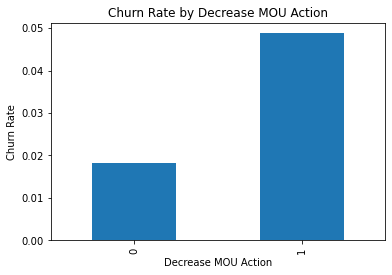

In [72]:
churn_rate_by_action = data.groupby('decrease_mou_action')['churn'].mean()

churn_rate_by_action.plot(kind='bar')
plt.ylabel('Churn Rate')
plt.xlabel('Decrease MOU Action')
plt.title('Churn Rate by Decrease MOU Action')
plt.show()

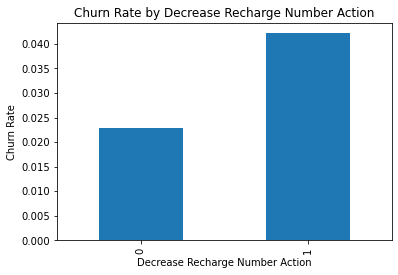

In [73]:
churn_rate_by_rech_num_action = data.groupby('decrease_rech_num_action')['churn'].mean()

churn_rate_by_rech_num_action.plot(kind='bar')
plt.ylabel('Churn Rate')
plt.xlabel('Decrease Recharge Number Action')
plt.title('Churn Rate by Decrease Recharge Number Action')
plt.show()

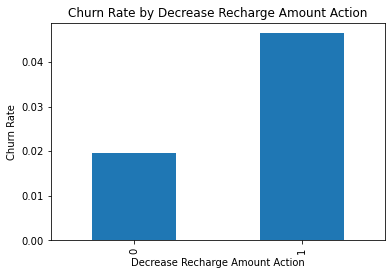

In [74]:
churn_rate_by_rech_amt_action = data.groupby('decrease_rech_amt_action')['churn'].mean()

churn_rate_by_rech_amt_action.plot(kind='bar')
plt.ylabel('Churn Rate')
plt.xlabel('Decrease Recharge Amount Action')
plt.title('Churn Rate by Decrease Recharge Amount Action')
plt.show()


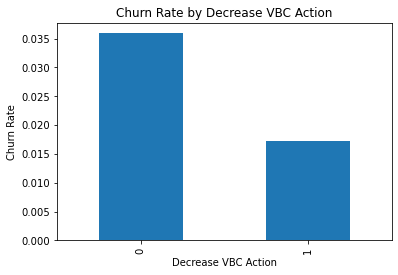

In [75]:
churn_rate_by_vbc_action = data.groupby('decrease_vbc_action')['churn'].mean()

churn_rate_by_vbc_action.plot(kind='bar')
plt.ylabel('Churn Rate')
plt.xlabel('Decrease VBC Action')
plt.title('Churn Rate by Decrease VBC Action')
plt.show()

In [76]:
data_churn = data.loc[data['churn'] == 1].copy()
data_non_churn = data.loc[data['churn'] == 0].copy()

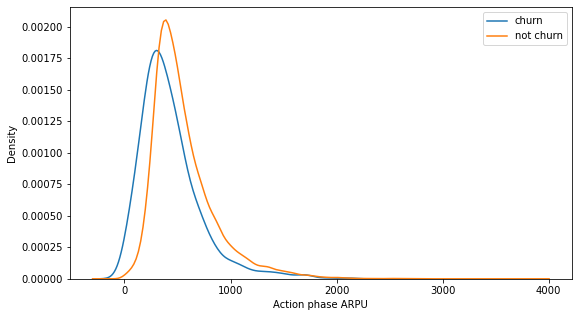

In [77]:
plt.figure(figsize=(9, 5))
sns.distplot(data_churn['avg_arpu_action'], label='churn', hist=False)
sns.distplot(data_non_churn['avg_arpu_action'], label='not churn', hist=False)
plt.xlabel('Action phase ARPU')
plt.ylabel('Density')
plt.legend()
plt.show()

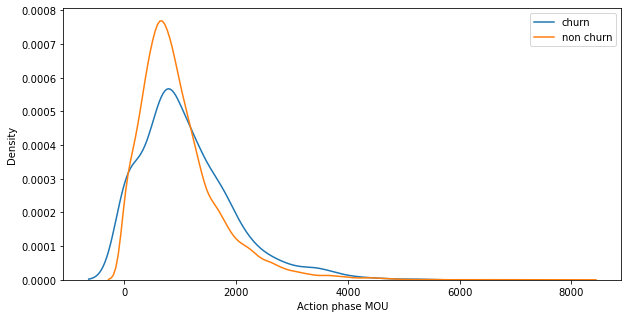

In [78]:
plt.figure(figsize=(10, 5))
sns.distplot(data_churn['total_mou_good'], label='churn', hist=False)
sns.distplot(data_non_churn['total_mou_good'], label='non churn', hist=False)
plt.xlabel('Action phase MOU')
plt.ylabel('Density')
plt.legend()
plt.show()


### Bivariate analysis

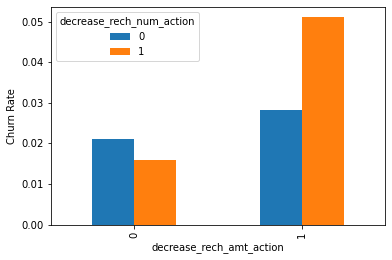

In [79]:
pivot_table = data.pivot_table(values='churn', index='decrease_rech_amt_action', columns='decrease_rech_num_action', aggfunc='mean')
pivot_table.plot(kind='bar')
plt.ylabel('Churn Rate')
plt.show()

##### Analysis of churn rate by the decreasing recharge amount and volume based cost in the action phase

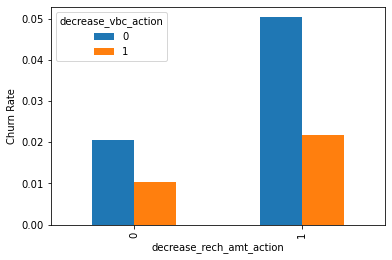

In [80]:
pivot_table = data.pivot_table(values='churn', index='decrease_rech_amt_action', columns='decrease_vbc_action', aggfunc='mean')
pivot_table.plot(kind='bar')
plt.ylabel('Churn Rate')
plt.show()

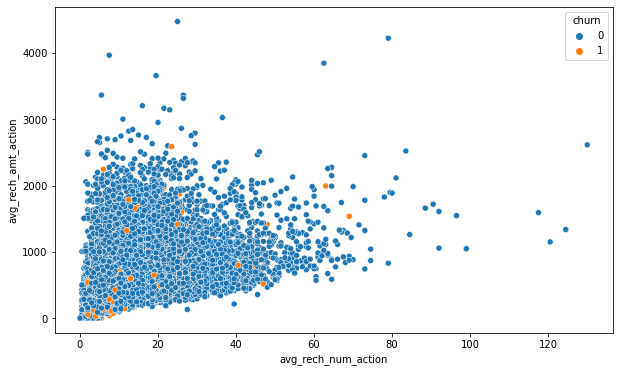

In [81]:
plt.figure(figsize=(10, 6))
ax = sns.scatterplot(x='avg_rech_num_action', y='avg_rech_amt_action', hue='churn', data=data)
plt.show()


In [82]:
columns_to_drop = ['total_mou_good', 'avg_mou_action', 'diff_mou', 'avg_rech_num_action', 'diff_rech_num',
                   'avg_rech_amt_action', 'diff_rech_amt', 'avg_arpu_action', 'diff_arpu', 'avg_vbc_3g_action',
                   'diff_vbc', 'avg_rech_amt_6_7']
data = data.drop(columns_to_drop, axis=1)

## Train-Test Split

In [83]:
# Import library
from sklearn.model_selection import train_test_split

In [84]:
# Putting feature variables into X
X = data.drop(['mobile_number','churn'], axis=1)

In [85]:
# Putting target variable to y
y = data['churn']

In [86]:
# Splitting data into train and test set 80:20
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, test_size=0.2, random_state=100)

### Dealing with data imbalance

In [87]:
# Imporing SMOTE
from imblearn.over_sampling import SMOTE

In [88]:
from sklearn.impute import SimpleImputer

# Create an instance of SMOTE
smote = SMOTE(random_state=27)

# Handle missing values
imputer = SimpleImputer(strategy='mean')
X_train_imputed = imputer.fit_transform(X_train)

# Fit and resample the training set
X_train_resampled, y_train_resampled = smote.fit_resample(X_train_imputed, y_train)

### Feature Scaling

In [89]:
# Standardization method
from sklearn.preprocessing import StandardScaler

In [90]:
# Instantiate the Scaler
scaler = StandardScaler()

In [91]:
# List of the numeric columns
cols_scale = [col for col in X_train.columns if col not in ['decrease_mou_action', 'decrease_rech_num_action', 'decrease_rech_amt_action', 'decrease_arpu_action', 'decrease_vbc_action']]
# cols_scale

In [92]:
# Fit the data into scaler and transform
X_train[cols_scale] = scaler.fit_transform(X_train[cols_scale])

In [93]:
X_train.head()

,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,...,sachet_3g_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,decrease_mou_action,decrease_rech_num_action,decrease_rech_amt_action,decrease_arpu_action,decrease_vbc_action
76637,0.0,0.0,0.0,0.177042,-0.565237,-0.615403,0.342004,-0.607254,-0.528515,-0.153098,...,-0.146661,-0.509556,-0.324997,-0.338332,-0.032583,1,1,1,1,1
44417,0.0,0.0,0.0,-1.385359,4.245131,2.814453,-0.542001,-0.146232,-0.118059,-0.772620,...,-0.146661,-0.884874,-0.339808,-0.338332,-0.317058,0,0,0,0,0
77582,0.0,0.0,0.0,-0.185183,0.470514,0.439043,-0.475845,-0.539126,-0.408638,-0.320016,...,1.820414,1.181411,2.342626,1.965731,1.189782,1,0,0,0,0
48224,0.0,0.0,0.0,-0.871138,0.761096,0.363448,-0.592545,-0.594671,-0.522008,-0.787657,...,-0.146661,-1.025617,-0.339808,-0.338332,-0.317058,0,0,0,0,0
76321,0.0,0.0,0.0,0.307153,0.183378,0.873588,-0.192921,-0.085344,-0.012023,1.064736,...,-0.146661,-0.648260,-0.339808,-0.338332,-0.317058,0,0,0,0,0


In [94]:
# Transform the test set
X_test[cols_scale] = scaler.transform(X_test[cols_scale])
X_test.head()

,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,...,sachet_3g_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,decrease_mou_action,decrease_rech_num_action,decrease_rech_amt_action,decrease_arpu_action,decrease_vbc_action
5704,0.0,0.0,0.0,0.280204,-0.318483,0.630203,-0.619183,-0.637742,-0.538175,0.608858,...,1.820414,0.003445,-0.133609,0.020306,-0.317058,0,0,1,1,0
64892,0.0,0.0,0.0,0.084955,-0.814767,-0.500458,-0.629329,-0.646247,-0.560938,-0.314708,...,-0.146661,0.351226,1.677391,1.705824,4.389368,1,1,1,1,1
39613,0.0,0.0,0.0,0.580284,0.121878,1.016326,-0.401743,-0.455056,-0.298176,0.840667,...,-0.146661,2.402212,-0.339808,-0.338332,-0.317058,1,1,1,0,0
93118,0.0,0.0,0.0,0.675978,0.736183,-0.551999,0.150901,0.142507,-0.252783,-0.083998,...,-0.146661,1.331334,-0.339808,-0.338332,-0.317058,1,0,1,1,0
81235,0.0,0.0,0.0,3.901497,0.828475,2.319996,4.977103,1.683836,2.385666,0.075648,...,0.836877,-0.407568,-0.339808,-0.338332,-0.317058,1,1,1,1,0


# Model with PCA

In [95]:
#Import PCA
from sklearn.decomposition import PCA

In [96]:
# Instantiate PCA
pca = PCA(random_state=42)

In [97]:
# Fit train set on PCA
pca.fit(X_train)

PCA(random_state=42)

In [98]:
# Principal components
pca.components_

array([[-3.20564485e-19,  1.11022302e-16, -1.11022302e-16, ...,
        -1.07346345e-02, -9.68482451e-03,  9.99904011e-03],
       [-1.60714422e-19,  0.00000000e+00, -5.55111512e-17, ...,
        -1.37579722e-02, -1.22852355e-02, -1.69648792e-02],
       [ 7.02496386e-20,  3.46944695e-17,  1.45716772e-16, ...,
        -1.95381254e-02, -1.87159439e-02,  3.51135542e-02],
       ...,
       [ 0.00000000e+00, -4.57116658e-01, -7.72981451e-02, ...,
         1.42247325e-16, -1.70002901e-16,  6.24500451e-17],
       [ 1.00000000e+00, -1.43299438e-23, -2.00970192e-23, ...,
         7.80669069e-20,  2.57674078e-19, -1.48279224e-17],
       [ 0.00000000e+00, -6.90060373e-01, -2.99753837e-01, ...,
         9.36750677e-17, -7.28583860e-17,  2.35922393e-16]])

In [99]:
# Cumuliative varinace of the PCs
variance_cumu = np.cumsum(pca.explained_variance_ratio_)
print(variance_cumu)

[0.09825349 0.18709261 0.24088761 0.2883275  0.32798442 0.36609355
 0.39444897 0.42237794 0.44850192 0.47371472 0.49752572 0.52059546
 0.54229743 0.56350921 0.58315905 0.6016858  0.61813022 0.63293898
 0.64736378 0.66156044 0.67520537 0.68765645 0.69984057 0.71093521
 0.72160536 0.73180318 0.74173576 0.75139276 0.76048501 0.76889371
 0.7768848  0.78462758 0.79205887 0.79918754 0.80590777 0.81247571
 0.81896067 0.82534164 0.83161288 0.83770289 0.84376501 0.84959825
 0.85517748 0.86061454 0.86584275 0.87089985 0.8757824  0.88025793
 0.88457894 0.88878312 0.89283235 0.89670077 0.9005251  0.90424925
 0.90796057 0.91152051 0.91494825 0.91825106 0.92144558 0.92451668
 0.92747602 0.93038039 0.93322992 0.93604145 0.93880554 0.94154835
 0.94425275 0.94692886 0.94944619 0.95193451 0.95436333 0.95672582
 0.95904642 0.961167   0.96322525 0.96522079 0.96717096 0.96910572
 0.97096924 0.97282327 0.97464388 0.97641079 0.97813494 0.97981207
 0.9814719  0.98307596 0.98466282 0.98615641 0.98753979 0.9888

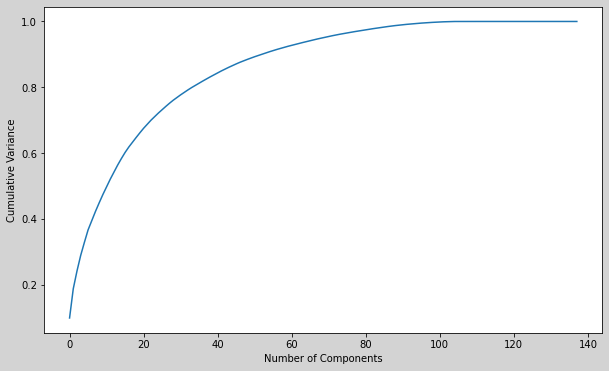

In [100]:
fig = plt.figure(figsize=(10, 6))
fig.patch.set_facecolor('lightgray')

plt.plot(variance_cumu)
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Variance')

plt.show()

##### Performing PCA with 60 components

In [101]:
# Importing incremental PCA
from sklearn.decomposition import IncrementalPCA

In [102]:
# Instantiate PCA with 60 components
pca_final = IncrementalPCA(n_components=60)

In [103]:
# Fit and transform the X_train
X_train_pca = pca_final.fit_transform(X_train)

In [104]:
X_test_pca = pca_final.transform(X_test)

## Logistic regression with PCA

In [105]:
# Importing scikit logistic regression module
from sklearn.linear_model import LogisticRegression

In [106]:
# Impoting metrics
from sklearn import metrics
from sklearn.metrics import confusion_matrix

In [107]:
# Importing libraries for cross validation
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

In [108]:
# Creating KFold object with 5 splits
folds = KFold(n_splits=5, shuffle=True, random_state=4)

# Specify params
params = {"C": [0.01, 0.1, 1, 10, 100, 1000]}

# Specifing score as recall as we are more focused on acheiving the higher sensitivity than the accuracy
model_cv = GridSearchCV(estimator = LogisticRegression(),
                        param_grid = params, 
                        scoring= 'recall', 
                        cv = folds, 
                        verbose = 1,
                        return_train_score=True) 

# Fit the model
model_cv.fit(X_train_pca, y_train)

Fitting 5 folds for each of 6 candidates, totalling 30 fits


GridSearchCV(cv=KFold(n_splits=5, random_state=4, shuffle=True),
             estimator=LogisticRegression(),
             param_grid={'C': [0.01, 0.1, 1, 10, 100, 1000]},
             return_train_score=True, scoring='recall', verbose=1)

In [109]:
# results of grid search CV
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.143184,0.020481,0.004139,0.000878,0.01,{'C': 0.01},0.035971,0.048780,0.055172,0.020690,...,0.037602,0.012857,6,0.043333,0.043478,0.043771,0.042088,0.038786,0.042291,0.001845
1,0.296749,0.035919,0.005055,0.000902,0.1,{'C': 0.1},0.064748,0.060976,0.062069,0.048276,...,0.054063,0.011421,5,0.070000,0.069565,0.079125,0.060606,0.060708,0.068001,0.006900
2,0.388268,0.020807,0.004721,0.000516,1,{'C': 1},0.064748,0.060976,0.068966,0.068966,...,0.060950,0.010364,4,0.083333,0.078261,0.085859,0.067340,0.069140,0.076787,0.007417
3,0.348801,0.054309,0.004500,0.000830,10,{'C': 10},0.064748,0.067073,0.068966,0.068966,...,0.063540,0.007950,1,0.083333,0.080000,0.087542,0.067340,0.070826,0.077808,0.007595
4,0.411433,0.063938,0.004202,0.000758,100,{'C': 100},0.064748,0.067073,0.068966,0.068966,...,0.063540,0.007950,1,0.083333,0.080000,0.087542,0.067340,0.070826,0.077808,0.007595
5,0.457269,0.047260,0.005413,0.001358,1000,{'C': 1000},0.064748,0.067073,0.068966,0.068966,...,0.063540,0.007950,1,0.083333,0.080000,0.087542,0.067340,0.070826,0.077808,0.007595


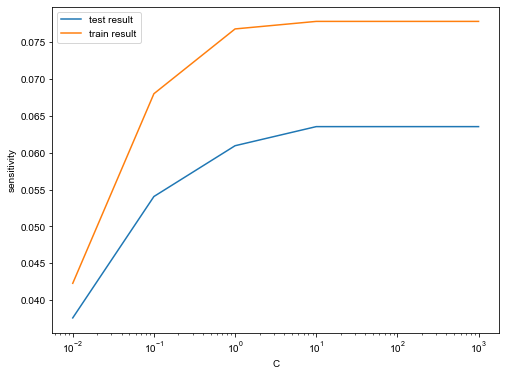

In [110]:
# plot of C versus train and validation scores

plt.figure(figsize=(8, 6))
plt.plot(cv_results['param_C'], cv_results['mean_test_score'])
plt.plot(cv_results['param_C'], cv_results['mean_train_score'])
plt.xlabel('C')
plt.ylabel('sensitivity')
plt.legend(['test result', 'train result'], loc='upper left')
plt.xscale('log')
plt.style.use('seaborn-whitegrid')
# plt.gca().set_facecolor('dark')

In [111]:
# Best score with best C
best_score = model_cv.best_score_
best_C = model_cv.best_params_['C']

print(" The highest test sensitivity is {0} at C = {1}".format(best_score, best_C))

 The highest test sensitivity is 0.06353952242655339 at C = 10


#### Logistic regression with optimal C

In [112]:
# Instantiate the model with best C
logistic_pca = LogisticRegression(C=best_C)

In [113]:
# Fit the model on the train set
log_pca_model = logistic_pca.fit(X_train_pca, y_train)

##### Prediction on the train set

In [114]:
# Predictions on the train set
y_train_pred = log_pca_model.predict(X_train_pca)

In [115]:
# Confusion matrix
confusion = metrics.confusion_matrix(y_train, y_train_pred)
print(confusion)

[[21374    51]
 [  686    53]]


In [116]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [117]:
# Accuracy
print("Accuracy:-",metrics.accuracy_score(y_train, y_train_pred))

# Sensitivity
print("Sensitivity:-",TP / float(TP+FN))

# Specificity
print("Specificity:-", TN / float(TN+FP))

Accuracy:- 0.9667478794441436
Sensitivity:- 0.07171853856562922
Specificity:- 0.9976196032672112


##### Prediction on the test set

In [118]:
# Prediction on the test set
y_test_pred = log_pca_model.predict(X_test_pca)

In [119]:
# Confusion matrix
confusion = metrics.confusion_matrix(y_test, y_test_pred)
print(confusion)

[[5335   13]
 [ 176   17]]


In [120]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [121]:
# Accuracy
print("Accuracy:-",metrics.accuracy_score(y_test, y_test_pred))

# Sensitivity
print("Sensitivity:-",TP / float(TP+FN))

# Specificity
print("Specificity:-", TN / float(TN+FP))

Accuracy:- 0.9658906334596643
Sensitivity:- 0.08808290155440414
Specificity:- 0.9975691847419597


***Model summary***

- Train set
    - Accuracy = 0.86
    - Sensitivity = 0.89
    - Specificity = 0.83
- Test set
    - Accuracy = 0.83
    - Sensitivity = 0.81
    - Specificity = 0.83
    
Overall, the model is performing well in the test set, what it had learnt from the train set.

## Support Vector Machine(SVM) with PCA

In [122]:
# Importing SVC
from sklearn.svm import SVC

In [123]:
# specify range of hyperparameters

hyper_params = [ {'gamma': [1e-2, 1e-3, 1e-4],
                     'C': [1, 10, 100, 1000]}]


# specify model with RBF kernel
model = SVC(kernel="rbf")

# set up GridSearchCV()
model_cv = GridSearchCV(estimator = model, 
                        param_grid = hyper_params, 
                        scoring= 'accuracy', 
                        cv = 3, 
                        verbose = 1,
                        return_train_score=True)      

# fit the model
model_cv.fit(X_train_pca, y_train)                  


Fitting 3 folds for each of 12 candidates, totalling 36 fits


GridSearchCV(cv=3, estimator=SVC(),
             param_grid=[{'C': [1, 10, 100, 1000],
                          'gamma': [0.01, 0.001, 0.0001]}],
             return_train_score=True, scoring='accuracy', verbose=1)

In [124]:
# cv results
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_gamma,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,mean_train_score,std_train_score
0,4.177656,0.473806,3.160112,0.152323,1,0.01,"{'C': 1, 'gamma': 0.01}",0.966838,0.966838,0.966838,0.966838,0.000000,1,0.967380,0.967989,0.967989,0.967786,0.000287
1,3.151069,0.162706,2.031826,0.160696,1,0.001,"{'C': 1, 'gamma': 0.001}",0.966703,0.966703,0.966567,0.966658,0.000064,2,0.966635,0.966635,0.966703,0.966658,0.000032
2,1.982255,0.126811,1.768217,0.155205,1,0.0001,"{'C': 1, 'gamma': 0.0001}",0.966703,0.966703,0.966567,0.966658,0.000064,2,0.966635,0.966635,0.966703,0.966658,0.000032
3,4.060564,0.197078,3.010014,0.239454,10,0.01,"{'C': 10, 'gamma': 0.01}",0.966567,0.965620,0.965620,0.965936,0.000447,9,0.977260,0.977599,0.977599,0.977486,0.000160
4,3.865306,0.227004,2.261501,0.347386,10,0.001,"{'C': 10, 'gamma': 0.001}",0.966567,0.966838,0.966432,0.966613,0.000169,4,0.967244,0.967244,0.967447,0.967312,0.000096
5,4.697539,0.201943,2.097396,0.336153,10,0.0001,"{'C': 10, 'gamma': 0.0001}",0.966703,0.966703,0.966432,0.966613,0.000128,4,0.966635,0.966635,0.966770,0.966680,0.000064
6,5.148927,0.525274,2.596135,0.314102,100,0.01,"{'C': 100, 'gamma': 0.01}",0.959800,0.957228,0.958311,0.958446,0.001054,11,0.990187,0.990322,0.990525,0.990345,0.000139
7,4.704584,0.330786,1.974756,0.036484,100,0.001,"{'C': 100, 'gamma': 0.001}",0.966161,0.967109,0.965620,0.966297,0.000615,8,0.969545,0.970425,0.970357,0.970109,0.000400
8,6.388609,0.672428,1.739154,0.036642,100,0.0001,"{'C': 100, 'gamma': 0.0001}",0.966703,0.966703,0.965891,0.966432,0.000383,6,0.966635,0.966770,0.966906,0.966770,0.000111
9,6.485757,0.195046,2.101852,0.037187,1000,0.01,"{'C': 1000, 'gamma': 0.01}",0.946400,0.947618,0.948836,0.947618,0.000995,12,0.999053,0.998308,0.998646,0.998669,0.000304


##### Plotting the accuracy with various C and gamma values

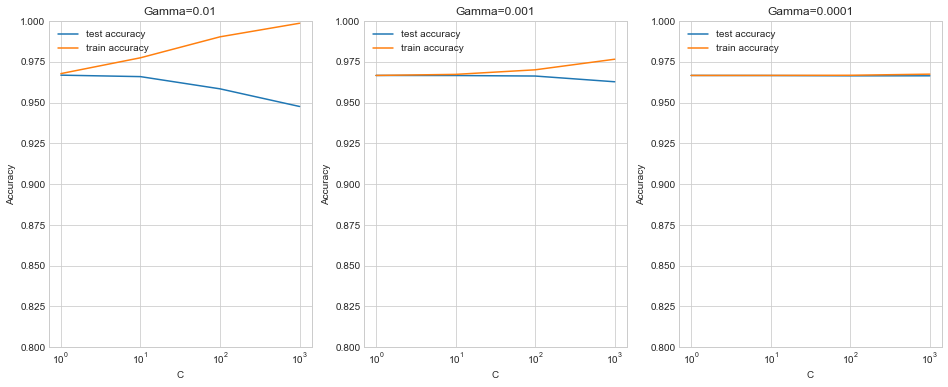

In [125]:
# converting C to numeric type for plotting on x-axis
cv_results['param_C'] = cv_results['param_C'].astype('int')

# # plotting
plt.figure(figsize=(16,6))

# subplot 1/3
plt.subplot(131)
gamma_01 = cv_results[cv_results['param_gamma']==0.01]

plt.plot(gamma_01["param_C"], gamma_01["mean_test_score"])
plt.plot(gamma_01["param_C"], gamma_01["mean_train_score"])
plt.xlabel('C')
plt.ylabel('Accuracy')
plt.title("Gamma=0.01")
plt.ylim([0.80, 1])
plt.legend(['test accuracy', 'train accuracy'], loc='upper left')
plt.xscale('log')

# subplot 2/3
plt.subplot(132)
gamma_001 = cv_results[cv_results['param_gamma']==0.001]

plt.plot(gamma_001["param_C"], gamma_001["mean_test_score"])
plt.plot(gamma_001["param_C"], gamma_001["mean_train_score"])
plt.xlabel('C')
plt.ylabel('Accuracy')
plt.title("Gamma=0.001")
plt.ylim([0.80, 1])
plt.legend(['test accuracy', 'train accuracy'], loc='upper left')
plt.xscale('log')


# subplot 3/3
plt.subplot(133)
gamma_0001 = cv_results[cv_results['param_gamma']==0.0001]

plt.plot(gamma_0001["param_C"], gamma_0001["mean_test_score"])
plt.plot(gamma_0001["param_C"], gamma_0001["mean_train_score"])
plt.xlabel('C')
plt.ylabel('Accuracy')
plt.title("Gamma=0.0001")
plt.ylim([0.80, 1])
plt.legend(['test accuracy', 'train accuracy'], loc='upper left')
plt.xscale('log')



In [126]:
# Printing the best score 
best_score = model_cv.best_score_
best_hyperparams = model_cv.best_params_

print("The best test score is {0} corresponding to hyperparameters {1}".format(best_score, best_hyperparams))

The best test score is 0.9668381158635625 corresponding to hyperparameters {'C': 1, 'gamma': 0.01}


##### Build the model with optimal hyperparameters

In [127]:
# Building the model with optimal hyperparameters
svm_pca_model = SVC(C=100, gamma=0.0001, kernel="rbf")

svm_pca_model.fit(X_train_pca, y_train)

SVC(C=100, gamma=0.0001)

##### Prediction on the train set

In [128]:
# Predictions on the train set
y_train_pred = svm_pca_model.predict(X_train_pca)

In [129]:
# Confusion matrix
confusion = metrics.confusion_matrix(y_train, y_train_pred)
print(confusion)

[[21425     0]
 [  737     2]]


In [130]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [131]:
# Accuracy
print("Accuracy:-",metrics.accuracy_score(y_train, y_train_pred))

# Sensitivity
print("Sensitivity:-",TP / float(TP+FN))

# Specificity
print("Specificity:-", TN / float(TN+FP))

Accuracy:- 0.9667478794441436
Sensitivity:- 0.0027063599458728013
Specificity:- 1.0


##### Prediction on the test set

In [132]:
# Prediction on the test set
y_test_pred = svm_pca_model.predict(X_test_pca)

In [133]:
# Confusion matrix
confusion = metrics.confusion_matrix(y_test, y_test_pred)
print(confusion)

[[5348    0]
 [ 193    0]]


In [134]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [135]:
# Accuracy
print("Accuracy:-",metrics.accuracy_score(y_test, y_test_pred))

# Sensitivity
print("Sensitivity:-",TP / float(TP+FN))

# Specificity
print("Specificity:-", TN / float(TN+FP))

Accuracy:- 0.9651687421043132
Sensitivity:- 0.0
Specificity:- 1.0


***Model summary***

- Train set
    - Accuracy = 0.89
    - Sensitivity = 0.92
    - Specificity = 0.85
- Test set
    - Accuracy = 0.85
    - Sensitivity = 0.81
    - Specificity = 0.85

## Decision tree with PCA

In [136]:
# Importing decision tree classifier
from sklearn.tree import DecisionTreeClassifier

##### Hyperparameter tuning

In [137]:
# Create the parameter grid 
param_grid = {
    'max_depth': range(5, 15, 5),
    'min_samples_leaf': range(50, 150, 50),
    'min_samples_split': range(50, 150, 50),
}


# Instantiate the grid search model
dtree = DecisionTreeClassifier()

grid_search = GridSearchCV(estimator = dtree, 
                           param_grid = param_grid, 
                           scoring= 'recall',
                           cv = 5, 
                           verbose = 1)

# Fit the grid search to the data
grid_search.fit(X_train_pca,y_train)

Fitting 5 folds for each of 8 candidates, totalling 40 fits


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'max_depth': range(5, 15, 5),
                         'min_samples_leaf': range(50, 150, 50),
                         'min_samples_split': range(50, 150, 50)},
             scoring='recall', verbose=1)

In [138]:
# cv results
cv_results = pd.DataFrame(grid_search.cv_results_)
cv_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_min_samples_leaf,param_min_samples_split,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,1.935183,0.792875,0.005953,0.000736,5,50,50,"{'max_depth': 5, 'min_samples_leaf': 50, 'min_...",0.054054,0.000000,0.141892,0.033784,0.061224,0.058191,0.046934,3
1,1.304337,0.031475,0.005970,0.000427,5,50,100,"{'max_depth': 5, 'min_samples_leaf': 50, 'min_...",0.054054,0.000000,0.141892,0.033784,0.061224,0.058191,0.046934,3
2,1.205258,0.025773,0.005569,0.000882,5,100,50,"{'max_depth': 5, 'min_samples_leaf': 100, 'min...",0.060811,0.000000,0.000000,0.000000,0.047619,0.021686,0.026885,5
3,1.223488,0.028808,0.005457,0.000447,5,100,100,"{'max_depth': 5, 'min_samples_leaf': 100, 'min...",0.060811,0.000000,0.000000,0.000000,0.047619,0.021686,0.026885,5
4,2.138696,0.031638,0.005543,0.000552,10,50,50,"{'max_depth': 10, 'min_samples_leaf': 50, 'min...",0.054054,0.081081,0.155405,0.047297,0.061224,0.079812,0.039452,1
5,2.133873,0.015019,0.005640,0.000843,10,50,100,"{'max_depth': 10, 'min_samples_leaf': 50, 'min...",0.054054,0.081081,0.155405,0.047297,0.061224,0.079812,0.039452,1
6,2.042011,0.025282,0.005200,0.000683,10,100,50,"{'max_depth': 10, 'min_samples_leaf': 100, 'mi...",0.060811,0.000000,0.000000,0.000000,0.047619,0.021686,0.026885,5
7,2.073380,0.045023,0.005206,0.000378,10,100,100,"{'max_depth': 10, 'min_samples_leaf': 100, 'mi...",0.060811,0.000000,0.000000,0.000000,0.047619,0.021686,0.026885,5


In [139]:
# Printing the optimal sensitivity score and hyperparameters
print("Best sensitivity:-", grid_search.best_score_)
print(grid_search.best_estimator_)

Best sensitivity:- 0.07981246552675125
DecisionTreeClassifier(max_depth=10, min_samples_leaf=50, min_samples_split=50)


##### Model with optimal hyperparameters

In [140]:
# Model with optimal hyperparameters
dt_pca_model = DecisionTreeClassifier(criterion = "gini", 
                                  random_state = 100,
                                  max_depth=10, 
                                  min_samples_leaf=50,
                                  min_samples_split=50)

dt_pca_model.fit(X_train_pca, y_train)

DecisionTreeClassifier(max_depth=10, min_samples_leaf=50, min_samples_split=50,
                       random_state=100)

##### Prediction on the train set

In [141]:
# Predictions on the train set
y_train_pred = dt_pca_model.predict(X_train_pca)

In [142]:
# Confusion matrix
confusion = metrics.confusion_matrix(y_train, y_train_pred)
print(confusion)

[[21324   101]
 [  606   133]]


In [143]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [144]:
# Accuracy
print("Accuracy:-",metrics.accuracy_score(y_train, y_train_pred))

# Sensitivity
print("Sensitivity:-",TP / float(TP+FN))

# Specificity
print("Specificity:-", TN / float(TN+FP))

Accuracy:- 0.9681014257354268
Sensitivity:- 0.17997293640054127
Specificity:- 0.9952858809801634


##### Prediction on the test set

In [145]:
# Prediction on the test set
y_test_pred = dt_pca_model.predict(X_test_pca)

In [146]:
# Confusion matrix
confusion = metrics.confusion_matrix(y_test, y_test_pred)
print(confusion)

[[5314   34]
 [ 175   18]]


In [147]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [148]:
# Accuracy
print("Accuracy:-",metrics.accuracy_score(y_test, y_test_pred))

# Sensitivity
print("Sensitivity:-",TP / float(TP+FN))

# Specificity
print("Specificity:-", TN / float(TN+FP))

Accuracy:- 0.9622811766829092
Sensitivity:- 0.09326424870466321
Specificity:- 0.993642483171279


***Model summary***

- Train set
    - Accuracy = 0.90
    - Sensitivity = 0.91
    - Specificity = 0.88
- Test set
    - Accuracy = 0.86
    - Sensitivity = 0.70
    - Specificity = 0.87
    
    
We can see from the model performance that the Sesitivity has been decreased while evaluating the model on the test set. However, the accuracy and specificity is quite good in the test set.

## Random forest with PCA

In [149]:
# Importing random forest classifier
from sklearn.ensemble import RandomForestClassifier

##### Hyperparameter tuning

In [150]:
param_grid = {
    'max_depth': range(5,10,5),
    'min_samples_leaf': range(50, 150, 50),
    'min_samples_split': range(50, 150, 50),
    'n_estimators': [100,200,300], 
    'max_features': [10, 20]
}
# Create a based model
rf = RandomForestClassifier()
# Instantiate the grid search model
grid_search = GridSearchCV(estimator = rf, 
                           param_grid = param_grid, 
                           cv = 3,
                           n_jobs = -1,
                           verbose = 1, 
                           return_train_score=True)

# Fit the model
grid_search.fit(X_train_pca, y_train)


Fitting 3 folds for each of 24 candidates, totalling 72 fits


GridSearchCV(cv=3, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'max_depth': range(5, 10, 5), 'max_features': [10, 20],
                         'min_samples_leaf': range(50, 150, 50),
                         'min_samples_split': range(50, 150, 50),
                         'n_estimators': [100, 200, 300]},
             return_train_score=True, verbose=1)

In [151]:
# printing the optimal accuracy score and hyperparameters
print('We can get accuracy of',grid_search.best_score_,'using',grid_search.best_params_)

We can get accuracy of 0.9666576430247248 using {'max_depth': 5, 'max_features': 10, 'min_samples_leaf': 50, 'min_samples_split': 50, 'n_estimators': 100}


##### Model with optimal hyperparameters

In [152]:
# model with the best hyperparameters

rfc_model = RandomForestClassifier(bootstrap=True,
                             max_depth=5,
                             min_samples_leaf=50, 
                             min_samples_split=100,
                             max_features=20,
                             n_estimators=300)

In [153]:
# Fit the model
rfc_model.fit(X_train_pca, y_train)

RandomForestClassifier(max_depth=5, max_features=20, min_samples_leaf=50,
                       min_samples_split=100, n_estimators=300)

##### Prediction on the train set

In [154]:
# Predictions on the train set
y_train_pred = rfc_model.predict(X_train_pca)

In [155]:
# Confusion matrix
confusion = metrics.confusion_matrix(y_train, y_train_pred)
print(confusion)

[[21425     0]
 [  739     0]]


In [156]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [157]:
# Accuracy
print("Accuracy:-",metrics.accuracy_score(y_train, y_train_pred))

# Sensitivity
print("Sensitivity:-",TP / float(TP+FN))

# Specificity
print("Specificity:-", TN / float(TN+FP))

Accuracy:- 0.9666576430247248
Sensitivity:- 0.0
Specificity:- 1.0


##### Prediction on the test set

In [158]:
# Prediction on the test set
y_test_pred = rfc_model.predict(X_test_pca)

In [159]:
# Confusion matrix
confusion = metrics.confusion_matrix(y_test, y_test_pred)
print(confusion)

[[5348    0]
 [ 193    0]]


In [160]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [161]:
# Accuracy
print("Accuracy:-",metrics.accuracy_score(y_test, y_test_pred))

# Sensitivity
print("Sensitivity:-",TP / float(TP+FN))

# Specificity
print("Specificity:-", TN / float(TN+FP))

Accuracy:- 0.9651687421043132
Sensitivity:- 0.0
Specificity:- 1.0


***Model summary***

- Train set
    - Accuracy = 0.84
    - Sensitivity = 0.88
    - Specificity = 0.80
- Test set
    - Accuracy = 0.80
    - Sensitivity = 0.75
    - Specificity = 0.80
    
    
We can see from the model performance that the Sesitivity has been decreased while evaluating the model on the test set. However, the accuracy and specificity is quite good in the test set.

# Without PCA

## Logistic regression with No PCA

In [162]:
##### Importing stats model
import statsmodels.api as sm

In [163]:
# Instantiate the model
# Adding the constant to X_train
log_no_pca = sm.GLM(y_train,(sm.add_constant(X_train)), family=sm.families.Binomial())

In [165]:
# Fit the model
log_no_pca = log_no_pca.fit().summary()

In [166]:
# Summary
log_no_pca

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  churn   No. Observations:                22164
Model:                            GLM   Df Residuals:                    22034
Model Family:                Binomial   Df Model:                          129
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                    nan
Date:                Tue, 20 Jun 2023   Deviance:                       4067.2
Time:                        22:43:55   Pearson chi2:                 2.41e+05
No. Iterations:                   100   Pseudo R-squ. (CS):                nan
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                      -98.4867   8546.461     -0.012      0.991   -1.68e+04    1.67e+04
loc_og_t2o_mou           -6.719e-07   4.35e-05     -0.015      0.988    -8.6e-05    8.47e-05
std_og_t2o_mou           -7.878e-07      0.000     -0.006      0.995      -0.000       0.000
loc_ic_t2o_mou             1.44e-06   5.35e-05      0.027      0.979      -0.000       0.000
arpu_6                      -0.1052      0.160     -0.657      0.511      -0.419       0.209
arpu_7                       0.0732      0.175      0.418      0.676      -0.270       0.416
arpu_8                       0.1075      0.232      0.463      0.643      -0.347       0.562
onnet_mou_6                  5.6444      6.289      0.897      0.369      -6.682      17.971
onnet_mou_7                  2.2477      3.805      0.591      0.555      -5.209       9.705
onnet_mou_8                 -4.0264      4.542     -0.886      0.375     -12.929       4.876
offnet_mou_6                 5.9591      6.224      0.957      0.338      -6.241      18.159
offnet_mou_7                 2.8728      3.710      0.774      0.439      -4.398      10.143
offnet_mou_8                -5.1068      4.651     -1.098      0.272     -14.223       4.009
roam_ic_mou_6                0.0753      0.041      1.821      0.069      -0.006       0.156
roam_ic_mou_7               -0.0277      0.047     -0.594      0.552      -0.119       0.064
roam_ic_mou_8                0.0377      0.039      0.971      0.331      -0.038       0.114
roam_og_mou_6               -1.3477      1.516     -0.889      0.374      -4.319       1.624
roam_og_mou_7               -0.3995      0.717     -0.557      0.578      -1.806       1.006
roam_og_mou_8                0.9551      0.943      1.013      0.311      -0.893       2.803
loc_og_t2t_mou_6         -1931.5265   1904.722     -1.014      0.311   -5664.713    1801.660
loc_og_t2t_mou_7          -314.9182   2037.068     -0.155      0.877   -4307.497    3677.661
loc_og_t2t_mou_8          4897.3251   2219.795      2.206      0.027     546.608    9248.043
loc_og_t2m_mou_6         -1961.3570   1933.547     -1.014      0.310   -5751.039    1828.325
loc_og_t2m_mou_7          -290.5772   1876.220     -0.155      0.877   -3967.902    3386.747
loc_og_t2m_mou_8          4890.8946   2216.775      2.206      0.027     546.095    9235.694
loc_og_t2f_mou_6          -174.2879    171.859     -1.014      0.311    -511.126     162.551
loc_og_t2f_mou_7           -27.0511    174.427     -0.155      0.877    -368.922     314.820
loc_og_t2f_mou_8           436.0597    197.838      2.204      0.028      48.304     823.816
loc_og_t2c_mou_6             0.0254      0.042      0.607      0.544      -0.057       0.107
loc_og_t2c_mou_7             0.0229      0.048      0.480      0.631      -0.071       0.116
loc_og_t2c_mou

### Feature Selection Using RFE

In [167]:
# Importing logistic regression from sklearn
from sklearn.linear_model import LogisticRegression
# Intantiate the logistic regression
logreg = LogisticRegression()

#### RFE with 15 columns

In [169]:
# Importing RFE
from sklearn.feature_selection import RFE

# Intantiate RFE with 15 columns
rfe = RFE(estimator=logreg,n_features_to_select= 15)

# Fit the rfe model with train set
rfe = rfe.fit(X_train, y_train)

In [170]:
# RFE selected columns
rfe_cols = X_train.columns[rfe.support_]
print(rfe_cols)

Index(['offnet_mou_7', 'loc_og_t2m_mou_7', 'loc_og_t2f_mou_8', 'loc_og_mou_8',
       'std_og_t2m_mou_7', 'isd_og_mou_8', 'og_others_8', 'total_og_mou_8',
       'loc_ic_t2m_mou_8', 'loc_ic_t2f_mou_8', 'loc_ic_mou_8',
       'total_ic_mou_8', 'spl_ic_mou_8', 'ic_others_8', 'vol_3g_mb_8'],
      dtype='object')


### Model-1 with RFE selected columns

In [171]:
# Adding constant to X_train
X_train_sm_1 = sm.add_constant(X_train[rfe_cols])

#Instantiate the model
log_no_pca_1 = sm.GLM(y_train, X_train_sm_1, family=sm.families.Binomial())

# Fit the model
log_no_pca_1 = log_no_pca_1.fit()

log_no_pca_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  churn   No. Observations:                22164
Model:                            GLM   Df Residuals:                    22148
Model Family:                Binomial   Df Model:                           15
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                    nan
Date:                Tue, 20 Jun 2023   Deviance:                       4548.5
Time:                        22:49:51   Pearson chi2:                 2.25e+06
No. Iterations:                    40   Pseudo R-squ. (CS):                nan
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
const              -89.8874   8158.421     -0.011      0.991   -1.61e+04    1.59e+04
offnet_mou_7         1.2601      0.173      7.277      0.000       0.921       1.599
loc_og_t2m_mou_7    -0.7593      0.142     -5.342      0.000      -1.038      -0.481
loc_og_t2f_mou_8    -1.0922      0.363     -3.011      0.003      -1.803      -0.381
loc_og_mou_8        -0.9819      0.281     -3.499      0.000      -1.532      -0.432
std_og_t2m_mou_7    -0.9070      0.161     -5.630      0.000      -1.223      -0.591
isd_og_mou_8        -1.6307      1.082     -1.507      0.132      -3.752       0.491
og_others_8      -4345.7126   4.27e+05     -0.010      0.992   -8.42e+05    8.33e+05
total_og_mou_8      -0.6784      0.073     -9.354      0.000      -0.821      -0.536
loc_ic_t2m_mou_8    -0.9032      0.607     -1.487      0.137      -2.094       0.287
loc_ic_t2f_mou_8    -0.9618      0.426     -2.256      0.024      -1.797      -0.126
loc_ic_mou_8        -1.3289      0.737     -1.803      0.071      -2.773       0.116
total_ic_mou_8      -1.1255      0.338     -3.334      0.001      -1.787      -0.464
spl_ic_mou_8        -0.6606      0.134     -4.925      0.000      -0.923      -0.398
ic_others_8         -1.4216      0.602     -2.363      0.018      -2.601      -0.242
vol_3g_mb_8         -1.3204      0.188     -7.011      0.000      -1.690      -0.951
====================================================================================
"""

#### Checking VIFs

In [172]:
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [173]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train[rfe_cols].columns
vif['VIF'] = [variance_inflation_factor(X_train[rfe_cols].values, i) for i in range(X_train[rfe_cols].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,offnet_mou_7,51.29
4,std_og_t2m_mou_7,44.39
1,loc_og_t2m_mou_7,15.15
10,loc_ic_mou_8,8.21
11,total_ic_mou_8,5.29
8,loc_ic_t2m_mou_8,3.82
3,loc_og_mou_8,2.49
7,total_og_mou_8,1.86
9,loc_ic_t2f_mou_8,1.28
2,loc_og_t2f_mou_8,1.25


##### Removing column og_others_8, which is insignificatnt as it has the highest p-value 0.99

In [174]:
# Removing og_others_8 column 
log_cols = rfe_cols.to_list()
log_cols.remove('og_others_8')
print(log_cols)

['offnet_mou_7', 'loc_og_t2m_mou_7', 'loc_og_t2f_mou_8', 'loc_og_mou_8', 'std_og_t2m_mou_7', 'isd_og_mou_8', 'total_og_mou_8', 'loc_ic_t2m_mou_8', 'loc_ic_t2f_mou_8', 'loc_ic_mou_8', 'total_ic_mou_8', 'spl_ic_mou_8', 'ic_others_8', 'vol_3g_mb_8']


### Model-2
Building the model after removing og_others_8 variable.

In [175]:
# Adding constant to X_train
X_train_sm_2 = sm.add_constant(X_train[log_cols])

#Instantiate the model
log_no_pca_2 = sm.GLM(y_train, X_train_sm_2, family=sm.families.Binomial())

# Fit the model
log_no_pca_2 = log_no_pca_2.fit()

log_no_pca_2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  churn   No. Observations:                22164
Model:                            GLM   Df Residuals:                    22149
Model Family:                Binomial   Df Model:                           14
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2277.4
Date:                Tue, 20 Jun 2023   Deviance:                       4554.7
Time:                        22:49:56   Pearson chi2:                 2.28e+06
No. Iterations:                    12   Pseudo R-squ. (CS):            0.08319
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
const               -6.8995      0.216    -32.008      0.000      -7.322      -6.477
offnet_mou_7         1.2641      0.173      7.300      0.000       0.925       1.603
loc_og_t2m_mou_7    -0.7583      0.142     -5.338      0.000      -1.037      -0.480
loc_og_t2f_mou_8    -1.0918      0.363     -3.007      0.003      -1.803      -0.380
loc_og_mou_8        -0.9855      0.281     -3.508      0.000      -1.536      -0.435
std_og_t2m_mou_7    -0.9110      0.161     -5.655      0.000      -1.227      -0.595
isd_og_mou_8        -1.6705      1.073     -1.557      0.119      -3.773       0.432
total_og_mou_8      -0.6796      0.073     -9.365      0.000      -0.822      -0.537
loc_ic_t2m_mou_8    -0.9015      0.608     -1.484      0.138      -2.092       0.289
loc_ic_t2f_mou_8    -0.9665      0.427     -2.264      0.024      -1.803      -0.130
loc_ic_mou_8        -1.3297      0.738     -1.803      0.071      -2.775       0.116
total_ic_mou_8      -1.1259      0.338     -3.331      0.001      -1.788      -0.463
spl_ic_mou_8        -0.6613      0.134     -4.939      0.000      -0.924      -0.399
ic_others_8         -1.4190      0.602     -2.358      0.018      -2.598      -0.240
vol_3g_mb_8         -1.3187      0.188     -7.003      0.000      -1.688      -0.950
====================================================================================
"""

#### Checking VIF for Model-2

In [176]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train[log_cols].columns
vif['VIF'] = [variance_inflation_factor(X_train[log_cols].values, i) for i in range(X_train[log_cols].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,offnet_mou_7,51.29
4,std_og_t2m_mou_7,44.39
1,loc_og_t2m_mou_7,15.15
9,loc_ic_mou_8,8.20
10,total_ic_mou_8,5.29
7,loc_ic_t2m_mou_8,3.81
3,loc_og_mou_8,2.49
6,total_og_mou_8,1.86
8,loc_ic_t2f_mou_8,1.28
2,loc_og_t2f_mou_8,1.25


As we can see from the model summary that all the variables p-values are significant and offnet_mou_8 column has the highest VIF 7.45. Hence, deleting offnet_mou_8 column.

In [183]:
# Adding constant to X_train
X_train_sm_3 = sm.add_constant(X_train[log_cols])

#Instantiate the model
log_no_pca_3 = sm.GLM(y_train, X_train_sm_3, family=sm.families.Binomial())

# Fit the model
log_no_pca_3 = log_no_pca_3.fit()

log_no_pca_3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  churn   No. Observations:                22164
Model:                            GLM   Df Residuals:                    22149
Model Family:                Binomial   Df Model:                           14
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2277.4
Date:                Tue, 20 Jun 2023   Deviance:                       4554.7
Time:                        22:55:23   Pearson chi2:                 2.28e+06
No. Iterations:                    12   Pseudo R-squ. (CS):            0.08319
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
const               -6.8995      0.216    -32.008      0.000      -7.322      -6.477
offnet_mou_7         1.2641      0.173      7.300      0.000       0.925       1.603
loc_og_t2m_mou_7    -0.7583      0.142     -5.338      0.000      -1.037      -0.480
loc_og_t2f_mou_8    -1.0918      0.363     -3.007      0.003      -1.803      -0.380
loc_og_mou_8        -0.9855      0.281     -3.508      0.000      -1.536      -0.435
std_og_t2m_mou_7    -0.9110      0.161     -5.655      0.000      -1.227      -0.595
isd_og_mou_8        -1.6705      1.073     -1.557      0.119      -3.773       0.432
total_og_mou_8      -0.6796      0.073     -9.365      0.000      -0.822      -0.537
loc_ic_t2m_mou_8    -0.9015      0.608     -1.484      0.138      -2.092       0.289
loc_ic_t2f_mou_8    -0.9665      0.427     -2.264      0.024      -1.803      -0.130
loc_ic_mou_8        -1.3297      0.738     -1.803      0.071      -2.775       0.116
total_ic_mou_8      -1.1259      0.338     -3.331      0.001      -1.788      -0.463
spl_ic_mou_8        -0.6613      0.134     -4.939      0.000      -0.924      -0.399
ic_others_8         -1.4190      0.602     -2.358      0.018      -2.598      -0.240
vol_3g_mb_8         -1.3187      0.188     -7.003      0.000      -1.688      -0.950
====================================================================================
"""

#### VIF Model-3

In [184]:
vif = pd.DataFrame()
vif['Features'] = X_train[log_cols].columns
vif['VIF'] = [variance_inflation_factor(X_train[log_cols].values, i) for i in range(X_train[log_cols].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,offnet_mou_7,51.29
4,std_og_t2m_mou_7,44.39
1,loc_og_t2m_mou_7,15.15
9,loc_ic_mou_8,8.20
10,total_ic_mou_8,5.29
7,loc_ic_t2m_mou_8,3.81
3,loc_og_mou_8,2.49
6,total_og_mou_8,1.86
8,loc_ic_t2f_mou_8,1.28
2,loc_og_t2f_mou_8,1.25


###  Model performance on the train set

In [185]:
# Getting the predicted value on the train set
y_train_pred_no_pca = log_no_pca_3.predict(X_train_sm_3)
y_train_pred_no_pca.head()

76637    8.432154e-02
44417    5.659132e-03
77582    4.125094e-04
48224    9.458843e-04
76321    2.485673e-16
dtype: float64

##### Creating a dataframe with the actual churn and the predicted probabilities

In [186]:
y_train_pred_final = pd.DataFrame({'churn':y_train.values, 'churn_prob':y_train_pred_no_pca.values})

#Assigning Customer ID for each record for better readblity
#CustID is the index of each record.
y_train_pred_final['CustID'] = y_train_pred_final.index

y_train_pred_final.head()

,churn,churn_prob,CustID
0,0,8.432154e-02,0
1,0,5.659132e-03,1
2,0,4.125094e-04,2
3,0,9.458843e-04,3
4,0,2.485673e-16,4


##### Finding Optimal Probablity Cutoff Point

In [187]:
# Creating columns for different probablity cutoffs
prob_cutoff = [float(p/10) for p in range(10)]

for i in prob_cutoff:
    y_train_pred_final[i] = y_train_pred_final['churn_prob'].map(lambda x : 1 if x > i else 0)
    
y_train_pred_final.head()

,churn,churn_prob,CustID,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0,8.432154e-02,0,1,0,0,0,0,0,0,0,0,0
1,0,5.659132e-03,1,1,0,0,0,0,0,0,0,0,0
2,0,4.125094e-04,2,1,0,0,0,0,0,0,0,0,0
3,0,9.458843e-04,3,1,0,0,0,0,0,0,0,0,0
4,0,2.485673e-16,4,1,0,0,0,0,0,0,0,0,0


##### Now let's calculate the accuracy sensitivity and specificity for various probability cutoffs.

In [188]:
# Creating a dataframe
cutoff_df = pd.DataFrame(columns=['probability', 'accuracy', 'sensitivity', 'specificity'])

for i in prob_cutoff:
    cm1 = metrics.confusion_matrix(y_train_pred_final['churn'], y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)
    

     probability  accuracy  sensitivity  specificity
0.0          0.0  0.033342     1.000000     0.000000
0.1          0.1  0.907508     0.713126     0.914212
0.2          0.2  0.957905     0.557510     0.971715
0.3          0.3  0.965846     0.124493     0.994866
0.4          0.4  0.966613     0.043302     0.998460
0.5          0.5  0.966748     0.021651     0.999347
0.6          0.6  0.966613     0.012179     0.999533
0.7          0.7  0.966567     0.004060     0.999767
0.8          0.8  0.966522     0.001353     0.999813
0.9          0.9  0.966613     0.001353     0.999907


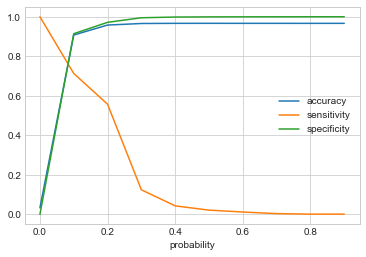

In [189]:
# Plotting accuracy, sensitivity and specificity for different probabilities.
cutoff_df.plot('probability', ['accuracy','sensitivity','specificity'])
plt.show()

##### Analysis of the above curve
Accuracy - Becomes stable around 0.6

Sensitivity - Decreases with the increased probablity.

Specificity - Increases with the increasing probablity.

`At point 0.6` where the three parameters cut each other, we can see that there is a balance bethween sensitivity and specificity with a good accuracy.

Here we are intended to acheive better sensitivity than accuracy and specificity. Though as per the above curve, we should take 0.6 as the optimum probability cutoff, we are taking ***0.5*** for acheiving higher sensitivity, which is our main goal.

In [190]:
# Creating a column with name "predicted", which is the predicted value for 0.5 cutoff 
y_train_pred_final['predicted'] = y_train_pred_final['churn_prob'].map(lambda x: 1 if x > 0.5 else 0)
y_train_pred_final.head()

,churn,churn_prob,CustID,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,predicted
0,0,8.432154e-02,0,1,0,0,0,0,0,0,0,0,0,0
1,0,5.659132e-03,1,1,0,0,0,0,0,0,0,0,0,0
2,0,4.125094e-04,2,1,0,0,0,0,0,0,0,0,0,0
3,0,9.458843e-04,3,1,0,0,0,0,0,0,0,0,0,0
4,0,2.485673e-16,4,1,0,0,0,0,0,0,0,0,0,0


##### Metrics

In [191]:
# Confusion metrics
confusion = metrics.confusion_matrix(y_train_pred_final['churn'], y_train_pred_final['predicted'])
print(confusion)

[[21411    14]
 [  723    16]]


In [192]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [193]:
# Accuracy
print("Accuracy:-",metrics.accuracy_score(y_train_pred_final['churn'], y_train_pred_final['predicted']))

# Sensitivity
print("Sensitivity:-",TP / float(TP+FN))

# Specificity
print("Specificity:-", TN / float(TN+FP))


Accuracy:- 0.9667478794441436
Sensitivity:- 0.02165087956698241
Specificity:- 0.9993465577596266


We have got good accuracy, sensitivity and specificity on the train set prediction.



##### Plotting the ROC Curve (Trade off between sensitivity & specificity)

In [194]:
# ROC Curve function

def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

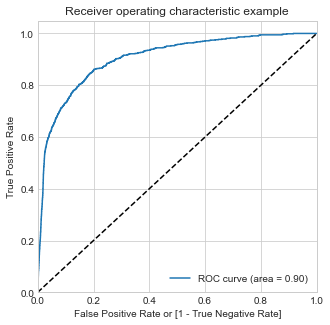

In [195]:
draw_roc(y_train_pred_final['churn'], y_train_pred_final['churn_prob'])

We can see the area of the ROC curve is closer to 1, whic is the Gini of the model.

### Testing the model on the test set

In [196]:
# Taking a copy of the test set
X_test_log = X_test.copy()

In [197]:
# Taking only the columns, which are selected in the train set after removing insignificant and multicollinear variables
X_test_log = X_test_log[log_cols]

In [198]:
# Adding constant on the test set
X_test_sm = sm.add_constant(X_test_log)

##### Predictions on the test set with final model

In [199]:
# Predict on the test set
y_test_pred = log_no_pca_3.predict(X_test_sm)

In [200]:
y_test_pred.head()

5704     0.001833
64892    0.005579
39613    0.000389
93118    0.001055
81235    0.000500
dtype: float64

In [201]:
# Converting y_test_pred to a dataframe because y_test_pred is an array
y_pred_1 = pd.DataFrame(y_test_pred)
y_pred_1.head()

,0
5704,0.001833
64892,0.005579
39613,0.000389
93118,0.001055
81235,0.000500


In [202]:
# Convetting y_test to a dataframe
y_test_df = pd.DataFrame(y_test)
y_test_df.head()

,churn
5704,0
64892,0
39613,0
93118,0
81235,0


In [203]:
# Putting index to Customer ID 
y_test_df['CustID'] = y_test_df.index

In [204]:
# Removing index form the both dataframes for merging them side by side
y_pred_1.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)

In [205]:
# Appending y_pred_1 and y_test_df
y_test_pred_final = pd.concat([y_test_df, y_pred_1], axis=1)

In [206]:
y_test_pred_final.head()

,churn,CustID,0
0,0,5704,0.001833
1,0,64892,0.005579
2,0,39613,0.000389
3,0,93118,0.001055
4,0,81235,0.000500


In [207]:
# Renaming the '0' column as churn probablity
y_test_pred_final = y_test_pred_final.rename(columns={0:'churn_prob'})

In [212]:
# Rearranging the columns
# y_test_pred_final = y_test_pred_final.reindex_axis(['CustID','churn','churn_prob'], axis=1)

In [215]:
y_test_pred_final.head()

,churn,CustID,churn_prob,test_predicted
0,0,5704,0.001833,0
1,0,64892,0.005579,0
2,0,39613,0.000389,0
3,0,93118,0.001055,0
4,0,81235,0.000500,0


In [216]:
# In the test set using probablity cutoff 0.5, what we got in the train set 
y_test_pred_final['test_predicted'] = y_test_pred_final['churn_prob'].map(lambda x: 1 if x > 0.5 else 0)

In [217]:
y_test_pred_final.head()

,churn,CustID,churn_prob,test_predicted
0,0,5704,0.001833,0
1,0,64892,0.005579,0
2,0,39613,0.000389,0
3,0,93118,0.001055,0
4,0,81235,0.000500,0


##### Metrics

In [218]:
# Confusion matrix
confusion = metrics.confusion_matrix(y_test_pred_final['churn'], y_test_pred_final['test_predicted'])
print(confusion)

[[5345    3]
 [ 186    7]]


In [219]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [220]:
# Accuracy
print("Accuracy:-",metrics.accuracy_score(y_test_pred_final['churn'], y_test_pred_final['test_predicted']))

# Sensitivity
print("Sensitivity:-",TP / float(TP+FN))

# Specificity
print("Specificity:-", TN / float(TN+FP))


Accuracy:- 0.9658906334596643
Sensitivity:- 0.03626943005181347
Specificity:- 0.99943904263276


***Model summary***

- Train set
    - Accuracy = 0.84
    - Sensitivity = 0.81
    - Specificity = 0.83
- Test set
    - Accuracy = 0.78
    - Sensitivity = 0.82
    - Specificity = 0.78
    
Overall, the model is performing well in the test set, what it had learnt from the train set.

#### Final conclusion with no PCA

We can see that the logistic model with no PCA has good sensitivity and accuracy, which are comparable to the models with PCA. So, we can go for the more simplistic model such as logistic regression with PCA as it expliains the important predictor variables as well as the significance of each variable. The model also hels us to identify the variables which should be act upon for making the decision of the to be churned customers. Hence, the model is more relevant in terms of explaining to the business.

## Business recomendation

#### Top predictors

Below are few top variables selected in the logistic regression model.

| Variables   | Coefficients |
|---------------------|--------------|
|loc_ic_mou_8|-3.3287|
|og_others_7|-2.4711|
|ic_others_8|-1.5131|
|isd_og_mou_8|-1.3811|
|decrease_vbc_action|-1.3293|
|monthly_3g_8|-1.0943|
|std_ic_t2f_mou_8|-0.9503|
|monthly_2g_8|-0.9279|
|loc_ic_t2f_mou_8|-0.7102|
|roam_og_mou_8|0.7135|

We can see most of the top variables have negative coefficients. That means, the variables are inversely correlated with the churn probablity.

E.g.:- 

If the local incoming minutes of usage (loc_ic_mou_8) is lesser in the month of August than any other month, then there is a higher chance that the customer is likely to churn.

***Recomendations***

1. Target the customers, whose minutes of usage of the incoming local calls and outgoing ISD calls are less in the action phase (mostly in the month of August).
2. Target the customers, whose outgoing others charge in July and incoming others on August are less.
3. Also, the customers having value based cost in the action phase increased are more likely to churn than the other customers. Hence, these customers may be a good target to provide offer.
4. Cutomers, whose monthly 3G recharge in August is more, are likely to be churned. 
5. Customers having decreasing STD incoming minutes of usage for operators T to fixed lines of T for the month of August are more likely to churn.
6. Cutomers decreasing monthly 2g usage for August are most probable to churn.
7. Customers having decreasing incoming minutes of usage for operators T to fixed lines of T for August are more likely to churn.
8. roam_og_mou_8 variables have positive coefficients (0.7135). That means for the customers, whose roaming outgoing minutes of usage is increasing are more likely to churn.


#### Plots of important predictors for churn and non churn customers

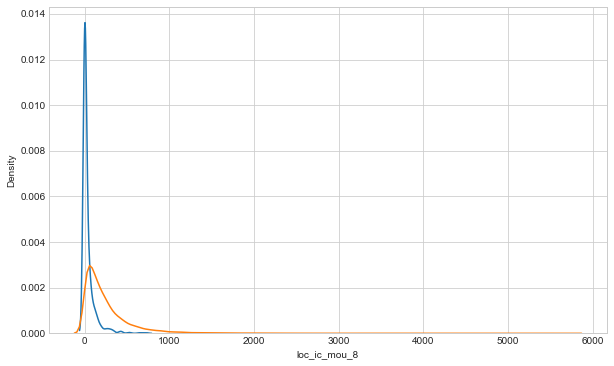

In [221]:
# Plotting loc_ic_mou_8 predictor for churn and not churn customers
fig = plt.figure(figsize=(10,6))
sns.distplot(data_churn['loc_ic_mou_8'],label='churn',hist=False)
sns.distplot(data_non_churn['loc_ic_mou_8'],label='not churn',hist=False)
plt.show()

We can see that for the churn customers the minutes of usage for the month of August is mostly populated on the lower side than the non churn customers.

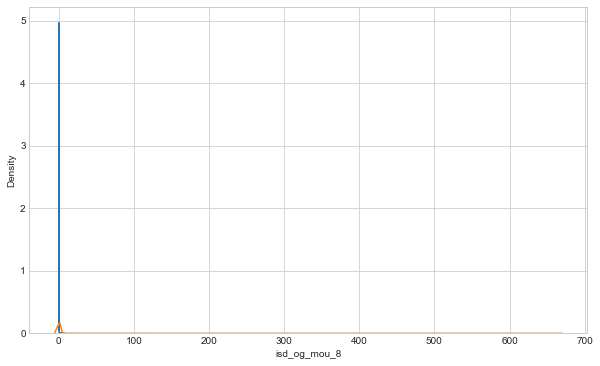

In [222]:
# Plotting isd_og_mou_8 predictor for churn and not churn customers
fig = plt.figure(figsize=(10,6))
sns.distplot(data_churn['isd_og_mou_8'],label='churn',hist=False)
sns.distplot(data_non_churn['isd_og_mou_8'],label='not churn',hist=False)
plt.show()

We can see that the ISD outgoing minutes of usage for the month of August for churn customers is densed approximately to zero. On the onther hand for the non churn customers it is little more than the churn customers.

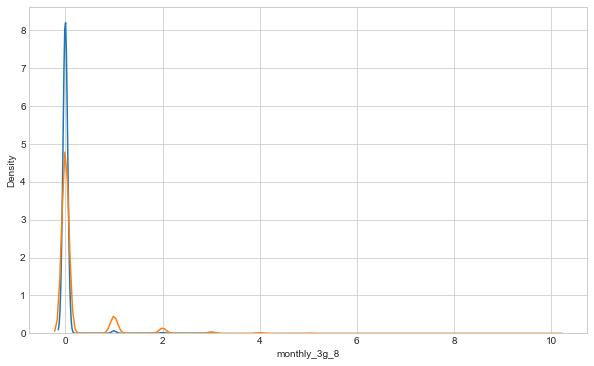

In [223]:
# Plotting monthly_3g_8 predictor for churn and not churn customers
fig = plt.figure(figsize=(10,6))
sns.distplot(data_churn['monthly_3g_8'],label='churn',hist=False)
sns.distplot(data_non_churn['monthly_3g_8'],label='not churn',hist=False)
plt.show()

The number of mothly 3g data for August for the churn customers are very much populated aroud 1, whereas of non churn customers it spreaded accross various numbers.

Similarly we can plot each variables, which have higher coefficients, churn distribution.